<a href="https://colab.research.google.com/github/swapnalishamrao/Unsupervised_ML_Clustering_Project/blob/main/Netflix_Movies_and_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='blue'>**<u>Netflix Movies and Tv Shows Clustering<u>**  

#### **Project Type**  - Unsupervised ML
#### **Contribution**  - Individual
#### **Name**          - Swapnali Shamrao Mane

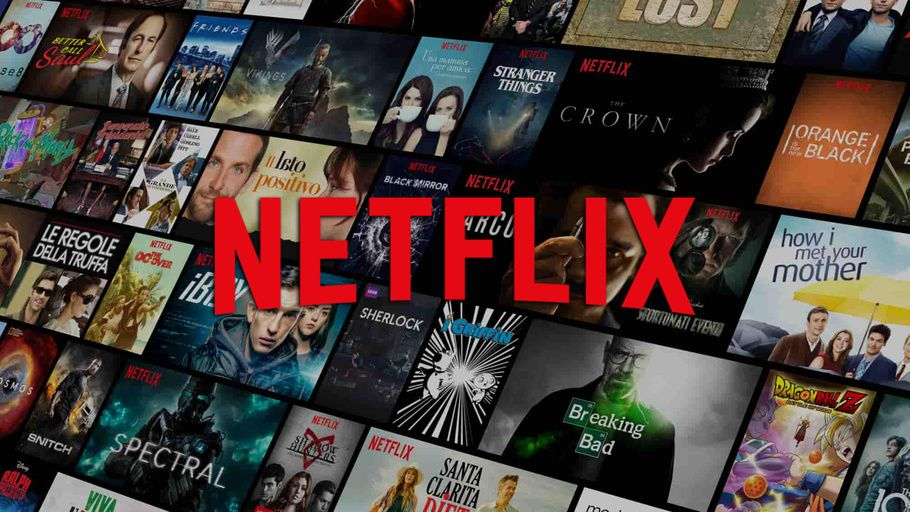

### <font size='5px'><font color='#grey'>**<u>Project Summary:-<u>**

**1.Project Objective**: The project aimed to group similar movies and TV shows on Netflix into clusters based on their content.

**2.Data Source**: Data was collected from a third-party Netflix search engine, providing details on over 7,000 Netflix titles.

**3.Data Description**: The dataset included information such as title, director, cast, country, date added, rating, and release year. Some data fields had missing values, which were addressed.

**4.Data Preprocessing**: Missing values were filled with placeholders like "Unavailable." The "date_added" feature was converted to datetime, and additional date-related features were created. Outliers in the "release year" were handled using the interquartile range.

**5.Data Analysis and Insights**:

* Netflix had more movies (69.14%) than TV shows (30.86%).
* Majority of movies were released between 2015 and 2020, while TV shows peaked between 2018 and 2020.
* 2017 was a significant year for movie releases, and 2020 for TV shows.
* Netflix shifted focus to releasing more TV shows than movies in 2020.
* Peak content additions occurred in 2019, with regular additions throughout the year.
* Most common content rating was TV-MA, followed by TV-14.
* The United States produced most movies on Netflix, with India in second place.
* The United States and the United Kingdom dominated TV show production.
* Raul Campos and Jan Suter directed many Netflix movies, while Alastair Fothergill was prominent in TV shows.
* International movies and dramas were popular content on Netflix.
* Common actors in Netflix content included Lee, Michel, David, Jhon, and James.
* Some correlations were observed between release year and day added, indicating Netflix's growth.

**6.Text Data Processing**: Text data from the description was cleaned by removing punctuation, stopwords, and digits. It was then converted into a TF-IDF matrix for clustering.

**7.Clustering Models**:

* Various clustering algorithms, including K-Means, Hierarchical, and DBSCAN, were applied.
* Out of all the methods we tried, the K-Means clustering model was the best at this job. It had a high score, which means it did a good job at putting similar things together.
* K-Means clustering performed the best with high Calinski-Harabasz and silhouette scores.

**8.Challenges Faced**:

Identifying the optimal number of clusters was challenging.
Methods like the Kelbow method and silhouette score took time to provide results.

**9.Project Outcome**: The project successfully organized Netflix movies and TV shows into clusters, making it easier for users to find content that suits their preferences.

**10.Conclusion**: Despite challenges, the project achieved its goal of clustering Netflix content effectively, enhancing the user experience on the platform.

### <font size='5px'><font color='grey'>**GitHub Link:-**

https://github.com/swapnalishamrao/Unsupervised_ML_Clustering_Project

## <font size='5px'><font color='deeppink'>**Problem Statement**

"We need to understand what types of TV shows and movies are available on Netflix and if there has been a shift towards more TV shows than movies in recent years. We also want to group similar content together for better user recommendations."

# <font size='5px'><font color='cgrey'>***Let's Begin !***

 <font size='5px'><font color='green'>**Importing Library and connecting drive**

In [1]:
# Import Libraries
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

#import warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 978.1 kB/s eta 0:00:00


### <font size='5px'><font color='purple'>**Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Unsupervised_ML_Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")

###<font size='5px'><font color='blue'>**Dataset First View**

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


###  <font size='5px'><font color='baby'>**<u>Data Inispection</u>**

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

Dataset having 7787 observations and 12 columns.

### <font size='5px'><font color='winered'>**Dataset Information**

In [7]:
#Information of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


1.In the dataset, there are object,  and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data(Numerical+Categorical)

4.There are 12 features

#### <font size='5px'><font color='#cwinered'>**Checking Duplicate Values**

In [8]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


We found that there were no duplicate entries in the above data.

#### <font size='5px'><font color='fkep'>**Checking Missing Values/Null Values**

In [9]:
# Checking for number of null values
count_null_df=df.isnull().sum()
count_null_df

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Missing Values Percentage
percentage_null_value = round(df.isna().sum()/len(df)*100, 2)

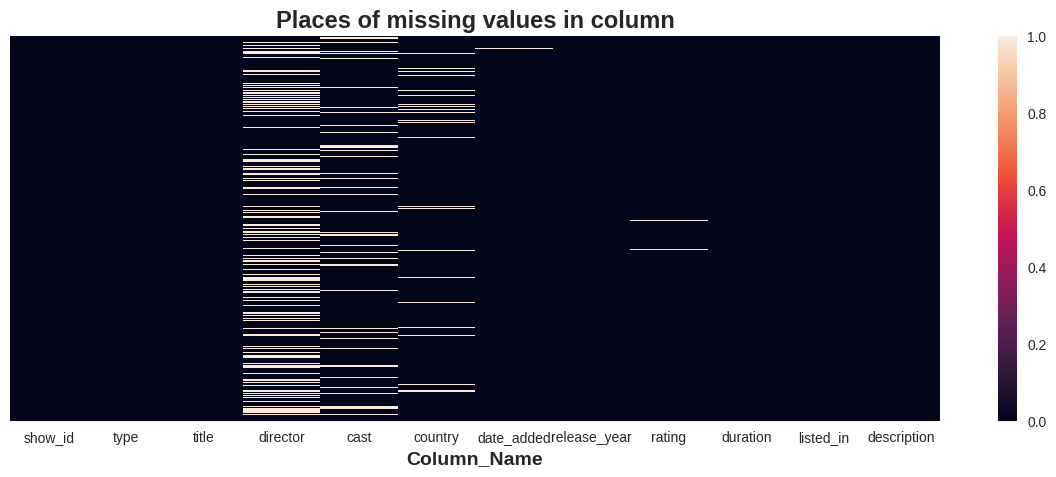

In [11]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

<Axes: >

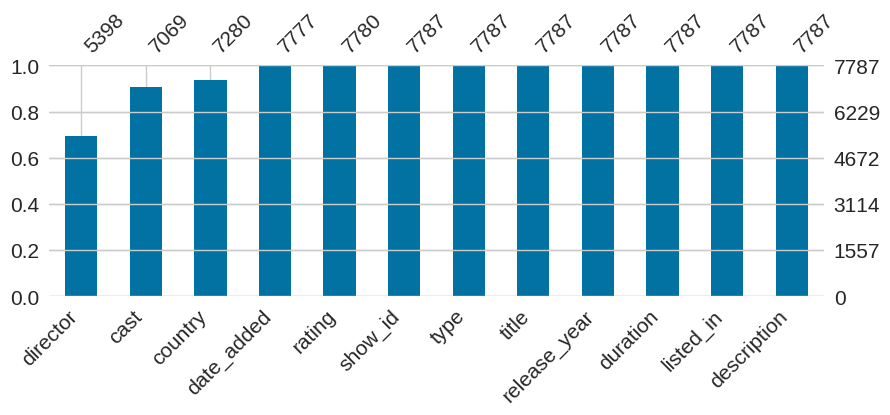

In [12]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='b',sort='ascending', figsize=(10,3), fontsize=15)

### What did you know about your dataset?

- There are 7787 rows and 12 columns in the dataset.
- In the director, cast, country, date_added, and rating columns, there are missing values.
- The dataset does not contain any duplicate values.

- Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values.
- Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## <font size='5px'><font color='doio'>***Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
# Bsic description of Dataset
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### <font size='5px'><font color='rdieadfd'>**Variables Description**

####**Data Description**
- show_id : Unique ID for every Movie/Show

- type : Identifier - Movie/Show

- title : Title of the Movie/Show

- director : Director of the Movie/Show

- cast : Actors involved in the Movie/Show

- country : Country where the Movie/Show was produced

- date_added : Date it was added on Netflix

- release_year : Actual Release year of the Movie/Show

- rating : TV Rating of the Movie/Show

- duration : Total Duration - in minutes or number of seasons

- listed_in : Genre

- description : The Summary description

In [15]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 11 categorical variables
------------------------------------------------------------------------------------------
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [16]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

show_id
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
------------------------------------------------------------------------------------------
type
['TV Show' 'Movie']
------------------------------------------------------------------------------------------
title
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
------------------------------------------------------------------------------------------
director
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
------------------------------------------------------------------------------------------
cast
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai,

- 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description' among the 1 categorical variables in this dataset.
- There are 1 numerical variables in this dataset:'release_year'

### <font size='5px'><font color='deeppink'>**Check Unique Values for each variable.**

In [17]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in show_id is 7787
----------------------------------------------------------------------------------------------------
No. of unique values in type is 2
----------------------------------------------------------------------------------------------------
No. of unique values in title is 7787
----------------------------------------------------------------------------------------------------
No. of unique values in director is 4049
----------------------------------------------------------------------------------------------------
No. of unique values in cast is 6831
----------------------------------------------------------------------------------------------------
No. of unique values in country is 681
----------------------------------------------------------------------------------------------------
No. of unique values in date_added is 1565
----------------------------------------------------------------------------------------------------
No. of unique values 

* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

# <font size='5px'><font color='paintgreen'>**Exploratory Data Analysis(EDA):-**

### **Content**

In [18]:
#Value count for content column
counts = df.type.value_counts()
percs = df.type.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Movie,TV Show
count,5377.00000,2410.00000
percentage,0.69051,0.30949


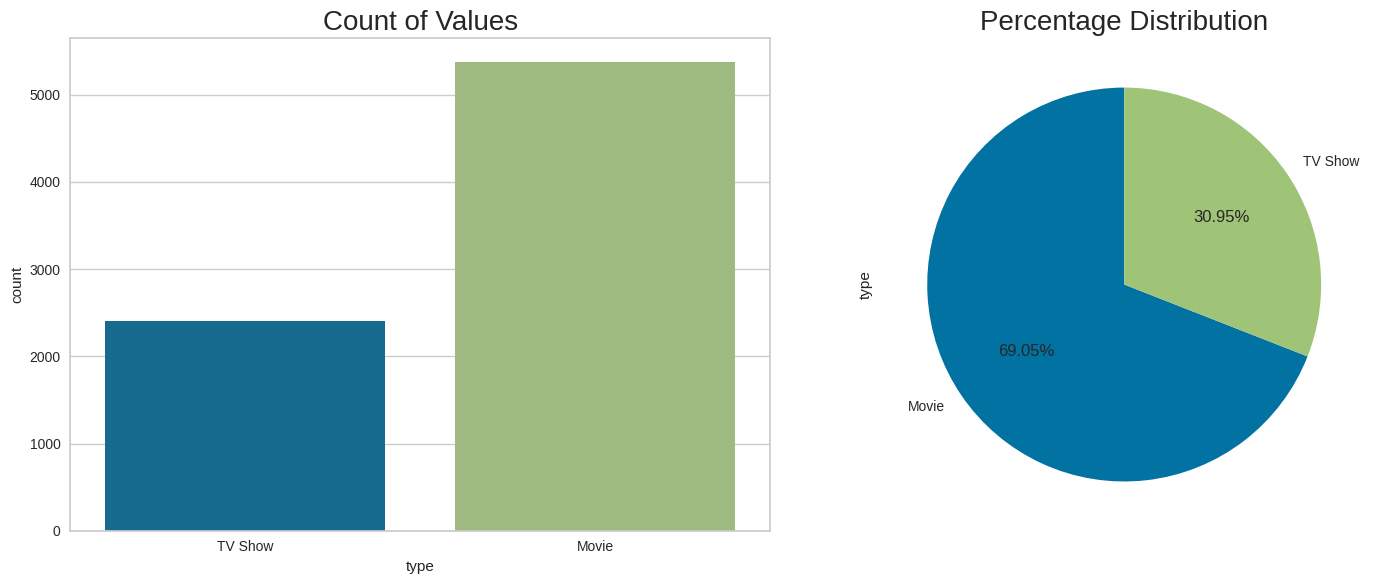

In [19]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x='type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

### **Ratings**

In [20]:
# number of unique values
df.rating.nunique()

14

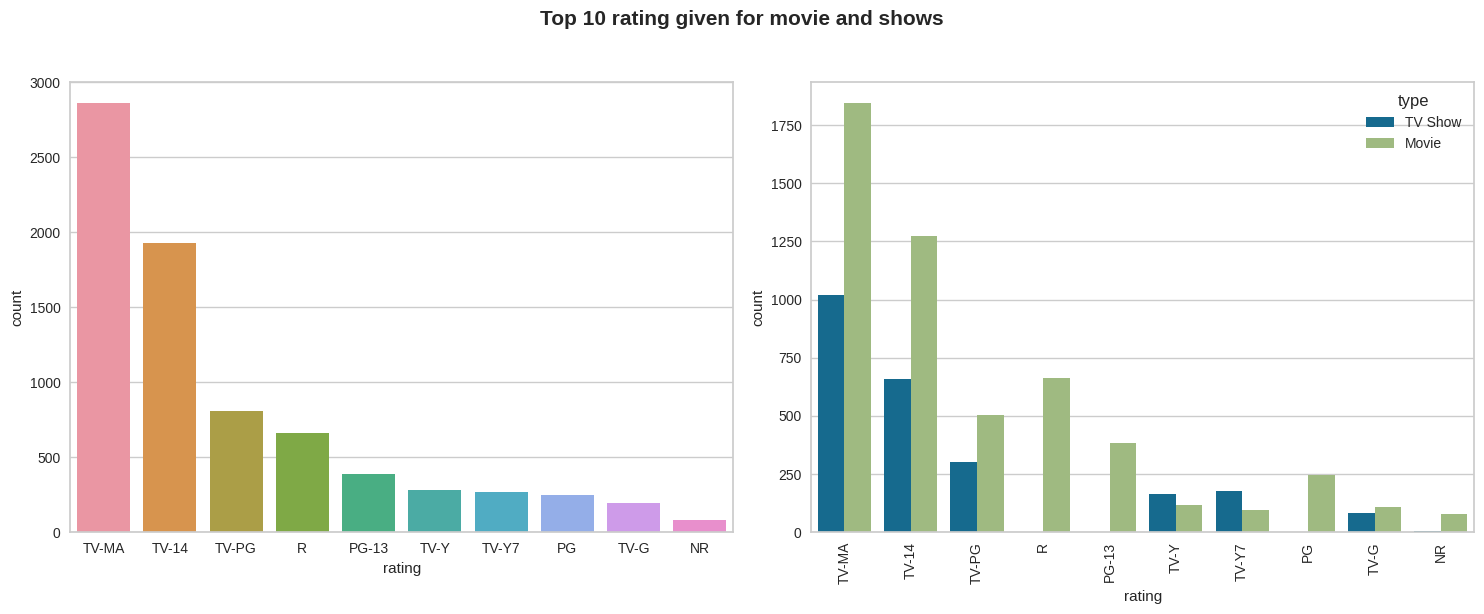

In [21]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [22]:
#Value count for rating column
counts = df.rating.value_counts()
percs = df.rating.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y,TV-Y7,PG,TV-G,NR,G,TV-Y7-FV,UR,NC-17
count,2863.000000,1931.000000,806.000000,665.000000,386.000000,280.00000,271.000000,247.000000,194.000000,84.000000,39.000000,6.000000,5.000000,3.000000
percentage,0.367995,0.248201,0.103599,0.085476,0.049614,0.03599,0.034833,0.031748,0.024936,0.010797,0.005013,0.000771,0.000643,0.000386


In [23]:
#creating two extra column
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [24]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

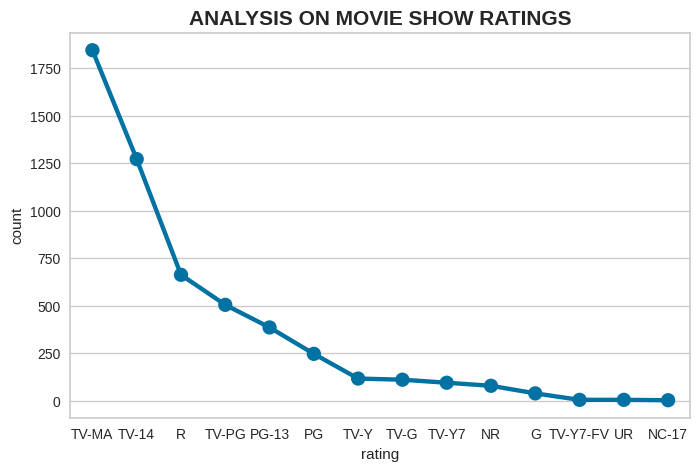

In [25]:
#Analysis on rating based on overall movie show rating system
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

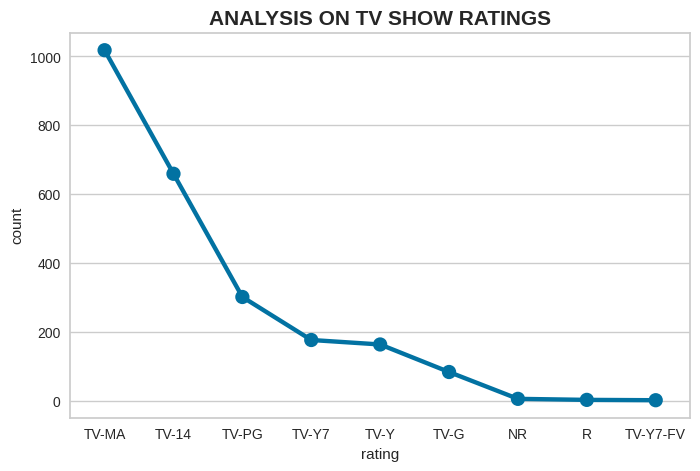

In [26]:
#Analysis rating based on overall tv show rating system
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

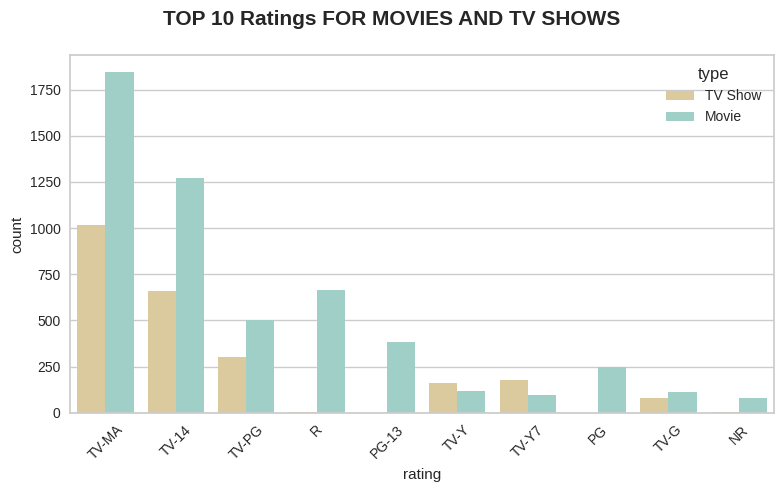

In [27]:
#Ananlysis top 10 Ratings Show
plt.figure(figsize=(8,5))
plt.suptitle('TOP 10 Ratings FOR MOVIES AND TV SHOWS',fontsize=15, fontweight='bold')
graph = sns.countplot(x="rating", data=df, hue='type',palette="BrBG", order=df['rating'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

## **title**

In [28]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

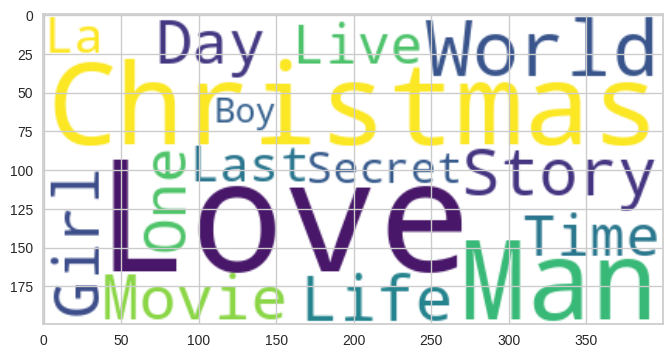

In [29]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

### **description**

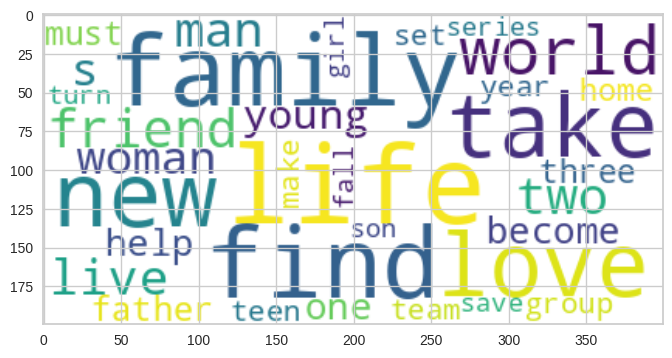

In [30]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

In [31]:
# number of unique values
df['country'].nunique()

681

In [32]:
#Value count for country column
counts = df.country.value_counts()
percs = df.country.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzerland, Germany","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands"
count,2555.000000,923.000000,397.000000,226.000000,183.000000,177.000000,134.000000,115.000000,101.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.350962,0.126786,0.054533,0.031044,0.025137,0.024313,0.018407,0.015797,0.013874,0.013736,...,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137


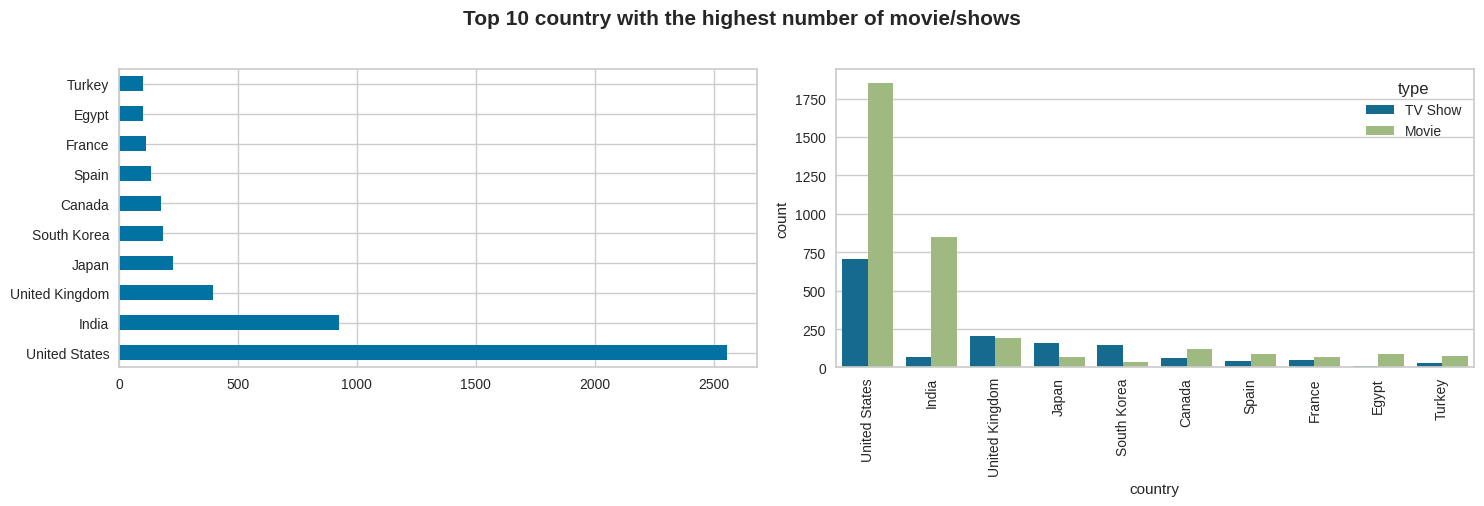

In [33]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type',order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

### **Release year**

In [34]:
# number of unique values
df['release_year'].nunique()

73

In [35]:
print(f'Oldest release year : {df.release_year.min()}')
print(f'Latest release year : {df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


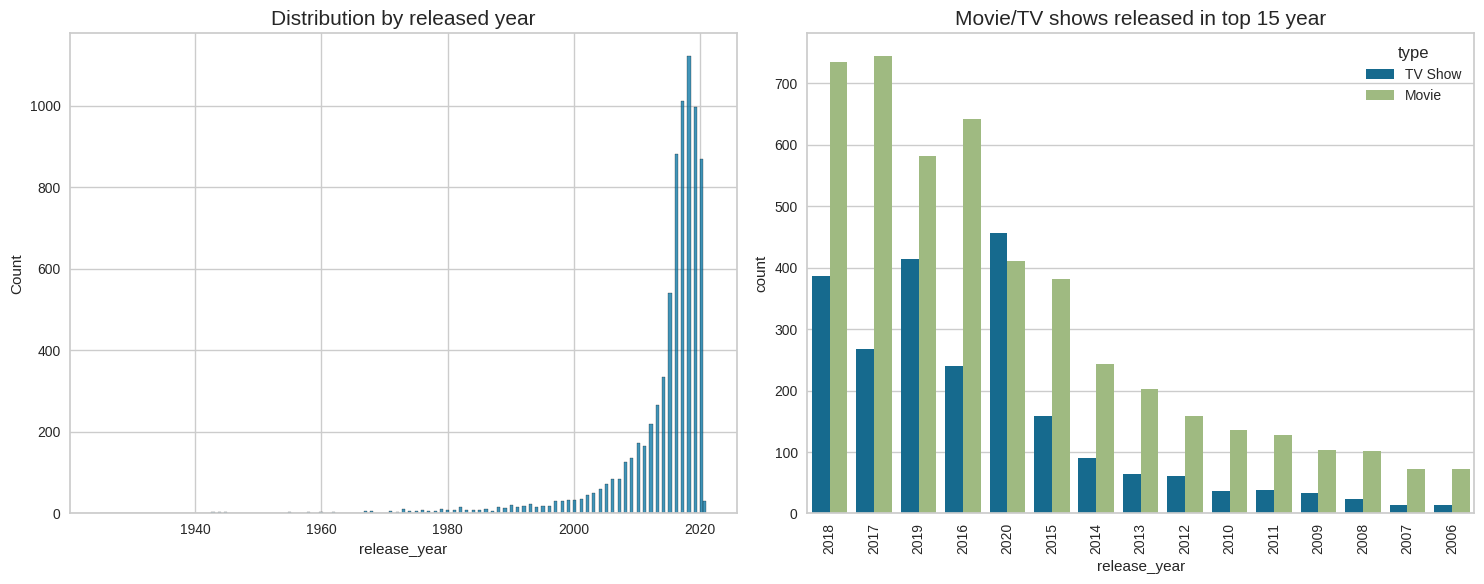

In [36]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [37]:
#Value count for year column
counts = df.release_year.value_counts()
percs = df.release_year.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
count,1121.000000,1012.00000,996.000000,882.000000,868.000000,541.000000,334.000000,267.000000,219.000000,173.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.143958,0.12996,0.127905,0.113266,0.111468,0.069475,0.042892,0.034288,0.028124,0.022217,...,0.000257,0.000257,0.000257,0.000257,0.000257,0.000128,0.000128,0.000128,0.000128,0.000128


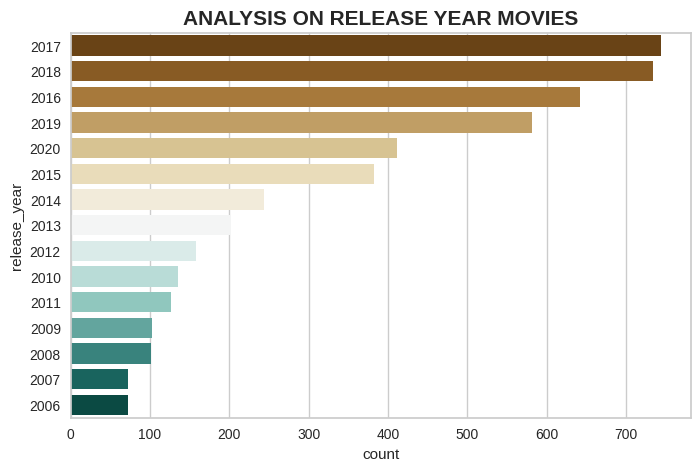

In [38]:
#Analysis on release year of movie show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=movies, palette="BrBG", order=movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR MOVIES', fontsize=15, fontweight='bold')
plt.show()

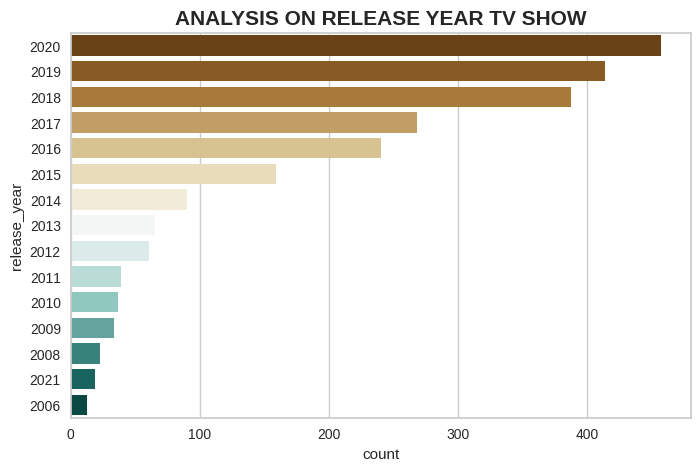

In [39]:
#Analysis release year of tv show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=tv_shows, palette="BrBG", order=tv_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR TV SHOW', fontsize=15, fontweight='bold')
plt.show()

*   **Netflix continues to add more shows on its platform over the years. Highest number of movies released in 2017 and 2018. Highest number of tv shows released in 2019  and 2020.**

*   **There is a decrease in the number of movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows. We have Netflix data only up to 2021, hence there are less movies added in this year.**

*   **The number of movies on Netflix is growing significantly faster than the number of TV shows. It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.**

### **director**

In [40]:
print(f'number of unique directors : {df.director.nunique()}')
print(f'null values in the column : {df.director.isna().sum()}')

number of unique directors : 4049
null values in the column : 2389


In [41]:
print(f"Number of Movies directed by directors are : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : {df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


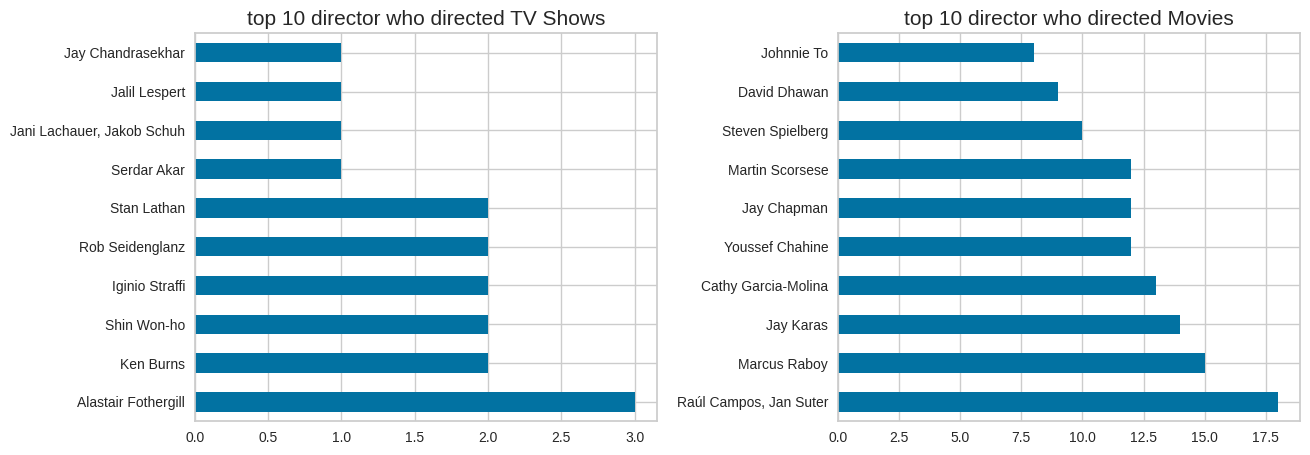

In [42]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

### **cast**

In [43]:
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [44]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [45]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


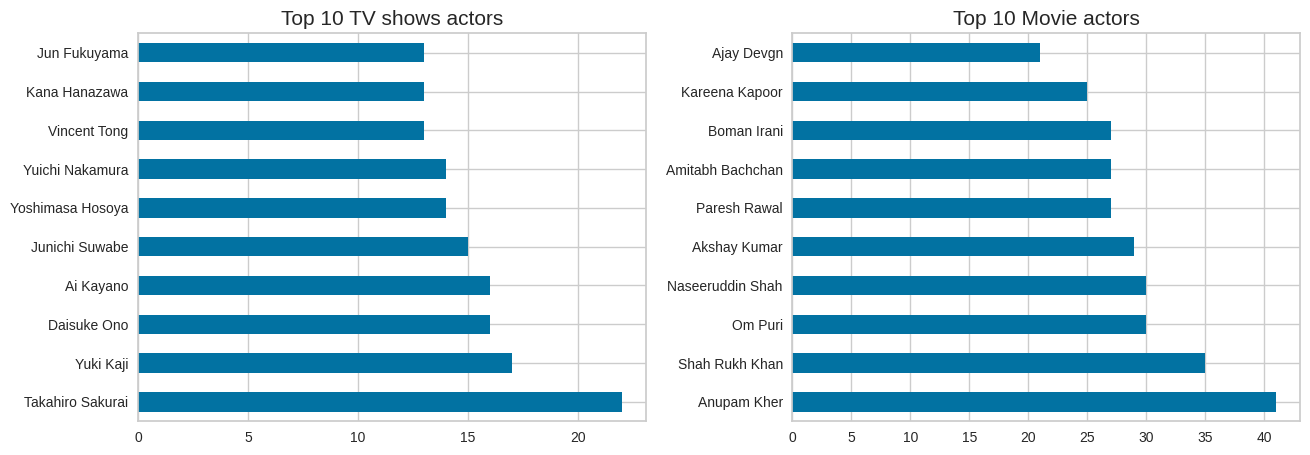

In [46]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

### **Release Month**

In [47]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [48]:
#Value count for month column
counts = df.month_added.value_counts()
percs = df.month_added.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,12.0,10.0,1.0,11.0,3.0,9.0,8.0,4.0,7.0,5.0,6.0,2.0
count,833.000000,785.000000,757.000000,738.000000,669.000000,619.000000,618.000000,601.000000,600.000000,543.000000,542.000000,472.000000
percentage,0.107111,0.100939,0.097338,0.094895,0.086023,0.079594,0.079465,0.077279,0.077151,0.069821,0.069693,0.060692


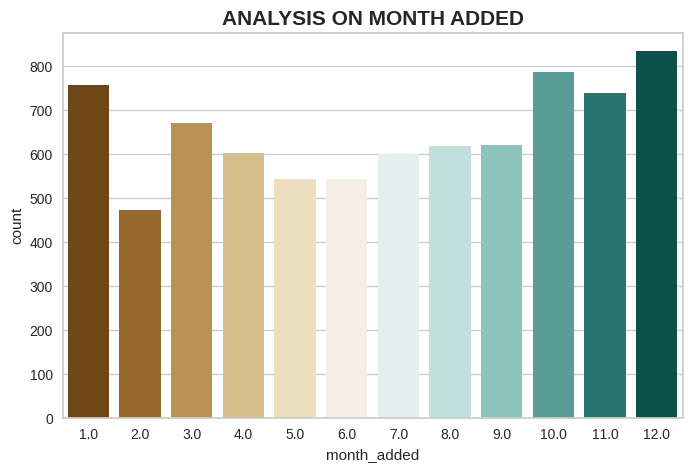

In [49]:
#Analysis on content added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED', fontsize=15, fontweight='bold')
plt.show()

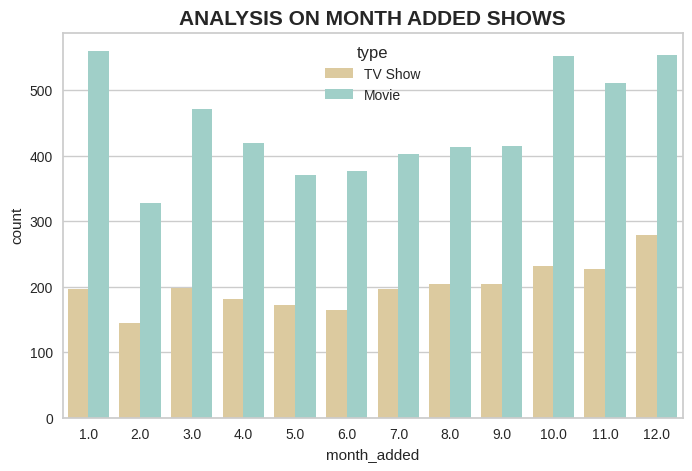

In [50]:
#Analysis on contnet(movies/tv shows) added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', hue='type',palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED SHOWS', fontsize=15, fontweight='bold')
plt.show()

The Christmas season (October, November, December, and January) sees a greater amount of content released. Compared to TV shows, more movies are released each month.

### **Genres**

In [51]:
#Value count for genres column
counts = df.listed_in.value_counts()
percs = df.listed_in.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Anime Series, Crime TV Shows, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334.000000,321.000000,320.000000,243.000000,215.00000,205.000000,177.00000,172.000000,169.000000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.042892,0.041223,0.041094,0.031206,0.02761,0.026326,0.02273,0.022088,0.021703,0.020675,...,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128


In [52]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


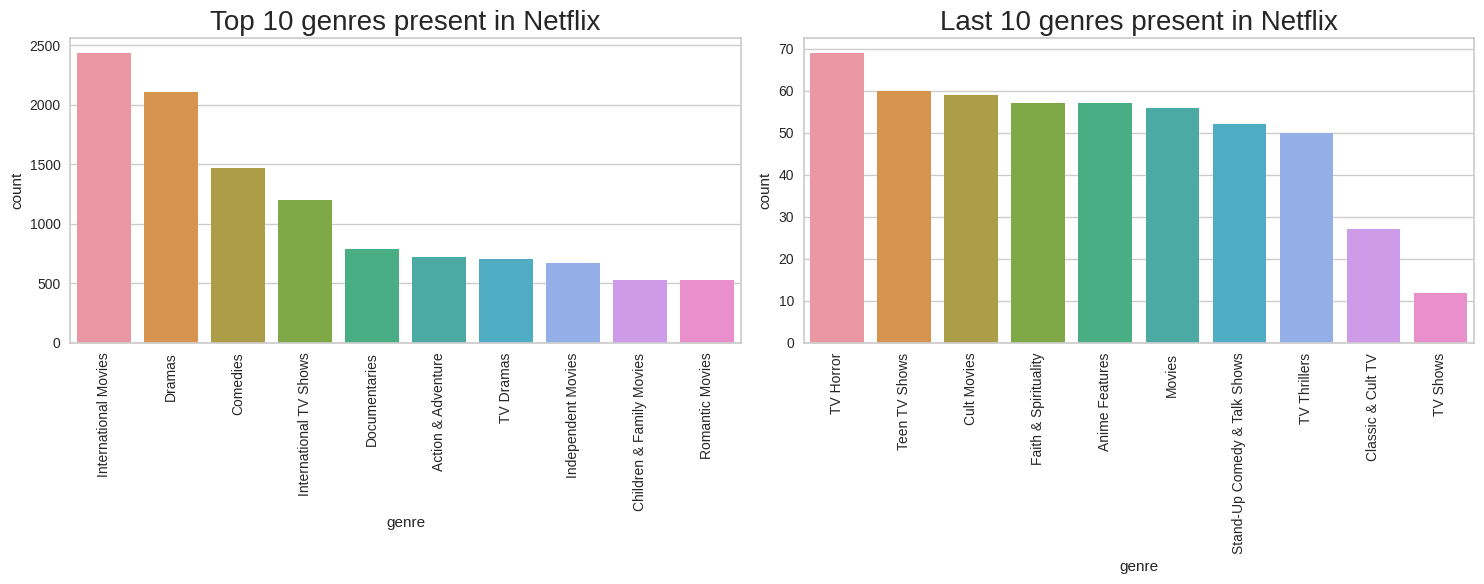

In [53]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

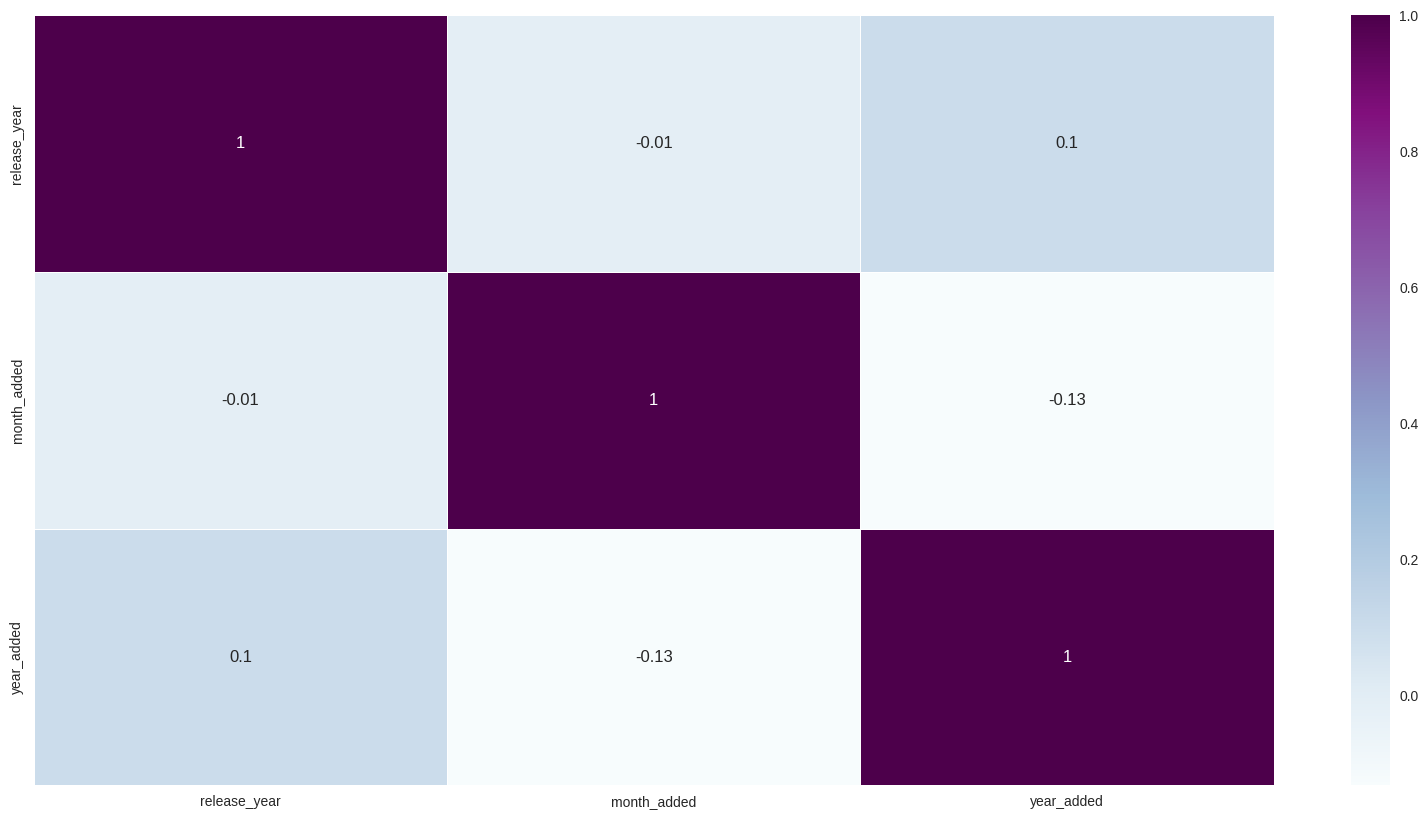

In [54]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

- We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.

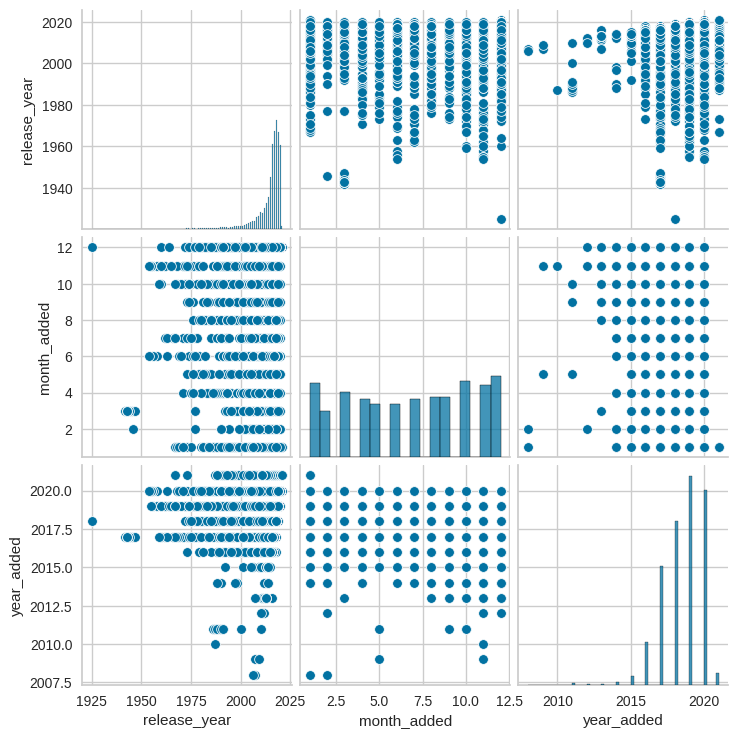

In [55]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

- Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
- We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

# <font size='5px'><font color='darkorange'>**Data Wrangling and Feature Engineering:-**

### **Handling duplicate values**

In [56]:
duplicates =len(df[df.duplicated()])
print(duplicates)

0


There were no duplicates found in the dataset

### **Handling Missing Value**

In [57]:
# Handling the missing values
df[['director','country']] = df[['director','country']].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Cast')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [58]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [59]:
#checking for missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
target_ages     0
month_added     0
year_added      0
dtype: int64

### What all manipulations have you done and insights you found?

The null values in the director and country columns are filled with the string "unknown," the cast column is 'no cast', and the mode value is used to fill the null values in the rating column. Finally, the records with null values in the "date_added" column have been removed.

## **Handling Outliers**

<Axes: xlabel='release_year'>

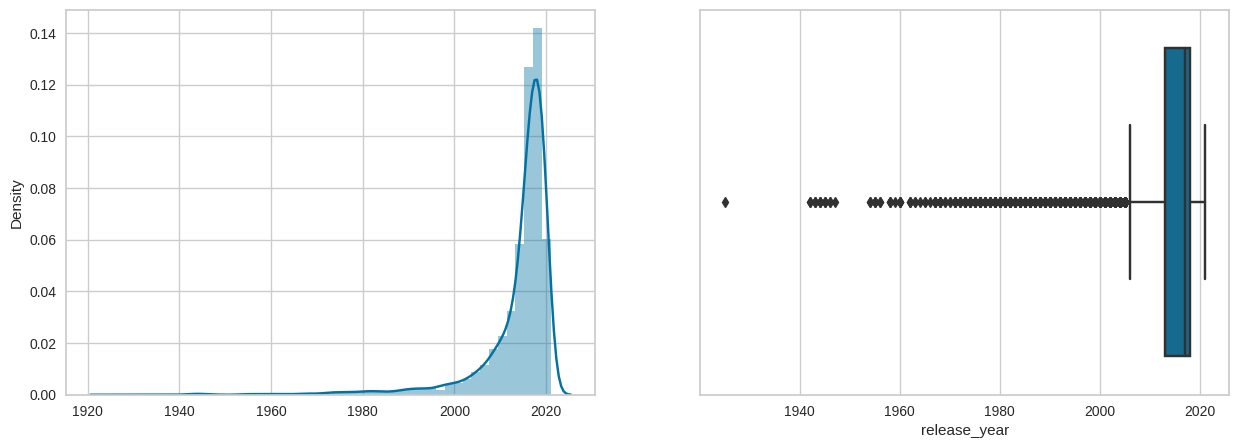

In [60]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(x=df['release_year'], data=df, ax=ax[1])

* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

# <font size='5px'><font color='purple'>**Hypothesis Testing**

To perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

## **Hypothesis 1**:-

## **Statement**:-
Average number of movies on Netflix in **United States** is greater than the average number of movies on Netflix in
**India**.


### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

####  Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df[df.country == 'United States']
india_movie_df = df[df.country == 'India']

In [62]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (1.057804475388561e-06) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

## **Hypothesis 2:-**

### Statement -
The number of **movies** available on Netflix is greater than the number of **TV shows** available on Netflix.

####  State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

####  Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

In [64]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

In [65]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")

Z-statistic: 47.71395895355864
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

# <font size='5px'><font color='red'>**Data Preprocessing**

### **Select Attributes**

Select the attributes based on which you want to cluster the shows

In [66]:
df.fillna('',inplace=True)

In [67]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] +' ' + df['description'])
df['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

We were able to successfully cluster all of the required data into a single column.

### **Removing non-ASCII characters:**

In [68]:
import unicodedata
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [69]:
# remove non-ascii characters
df['clustering'] = remove_non_ascii(df['clustering'])
df['clustering'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States, South Africa Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

We were able to successfully Removed non-ASCII characters.

### **Remove stopwords and lower case:**

In [70]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [71]:
# extracting and displaying the stopwords from nltk library
import nltk
from nltk.corpus import stopwords

# create a set of English stop words
sw = stopwords.words('english')

# displaying stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [72]:
# function to remove stop words
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [73]:
# Removing stop words
df['clustering'] = df['clustering'].apply(stopwords)
df['clustering'][50]

"roland emmerich steven strait, camilla belle, cliff curtis, joel virgel, affif ben badra, mo zinal, nathanael baring, mona hammond, omar sharif united states, south africa action & adventure fierce mammoth hunter d'leh sets impossible journey rescue woman loves vicious warlord save people village."

We have successfully changed the corpus to lowercase and removed all stopwords.

### **Remove punctuations**

In [74]:
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [75]:
# Removing punctuation marks
df['clustering'] = df['clustering'].apply(remove_punctuation)
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

We have effectively eliminate all the punctuation marks.

### **Lemmatization:**

In [76]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [77]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [78]:
# Lemmatization
df['clustering'] = lemmatize_verbs(df['clustering'])
df['clustering'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states south africa action  adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

We were able to successfully Lemmatize all of the required data

### **Tokenization:**

In [79]:
tokenizer = TweetTokenizer()
df['clustering'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x))
df['clustering'][50]

['roland',
 'emmerich',
 'steven',
 'strait',
 'camilla',
 'belle',
 'cliff',
 'curtis',
 'joel',
 'virgel',
 'affif',
 'ben',
 'badra',
 'mo',
 'zinal',
 'nathanael',
 'baring',
 'mona',
 'hammond',
 'omar',
 'sharif',
 'united',
 'states',
 'south',
 'africa',
 'action',
 'adventure',
 'fierce',
 'mammoth',
 'hunter',
 'dleh',
 'sets',
 'impossible',
 'journey',
 'rescue',
 'woman',
 'loves',
 'vicious',
 'warlord',
 'save',
 'people',
 'village']

We were able to successfully Tokenize all of the required data

### **Vectorization:**

In [80]:
# clustering tokens saved in a variable
clustering_data = df['clustering']

In [81]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [82]:
X

<7770x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 238134 stored elements in Compressed Sparse Row format>

In [83]:
X.shape

(7770, 20000)

In [84]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [85]:
# convert X into array form for clustering
X = X.toarray()

We were able to successfully Vectorize all of the required data

### <font size='5px'><font color='deeppink'>**Dimensionality reduction using PCA:**

In [86]:
# using PCA to reduce dimensionality
pca = PCA(random_state=50)
pca.fit(X)

PCA(random_state=50)

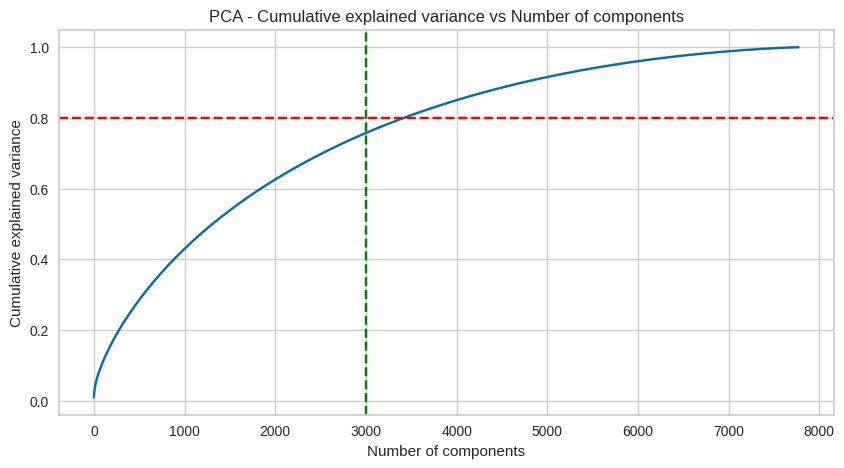

In [87]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()


*   **We find that around 7500 components account for 100% of the variance**
*   **Also, just 4000 components comprise more than 80% of the variation**
*   **As a result, we can pull the top 4000 components out of the model to make it simpler and less dimensional while still being able to account for more than 80% of variance.**

In [88]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=50)
pca.fit(X)

PCA(n_components=4000, random_state=50)

In [89]:
# transformed features
X = pca.transform(X)

In [90]:
# shape of transformed vectors
X.shape

(7770, 4000)

# <font size='5px'><font color='#grey'>**Model Model Implementation:-**

In [ ]:
## Function to evaluate and visualize evaluation metrics of the model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X , y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)

    # Data
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    # Create a plot
    # Creating silhouette visualizer
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)
    visualizer.poof()
    print('~~'*45)

    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)

    return {'Num_clusters':len(set(y_predict)),'y_predict':y_predict, 'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

In [ ]:
## Function to visualise clusters

def visualize_clusters(X, y_predict):
    # X is a 2D array of data points
    # y_predict is a 1D array of integer labels indicating which cluster each data point belongs to

    # Create a scatter plot of the data points, colored by their assigned cluster label
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

## <font size='5px'><font color='indigo'>**K-Means Clustering:**

In [ ]:
# Install yellowbrick library
!pip install yellowbrick

Text(0, 0.5, 'WCSS')

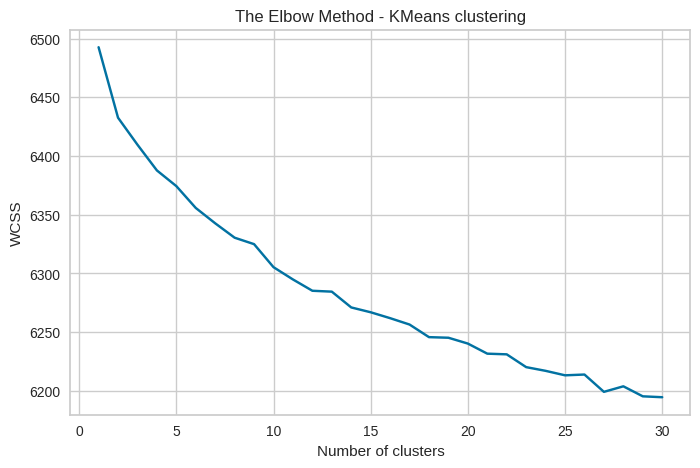

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(8,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

With more clusters, there is a decrease in the sum of squared distances between each point and the centroid.

In [ ]:
#Displaying Silhouette plot for k means clustering
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      y_predicts = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, y_predicts, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X)
      visualizer.poof()

For n_clusters = 2, silhouette score is 0.0055600856065321745


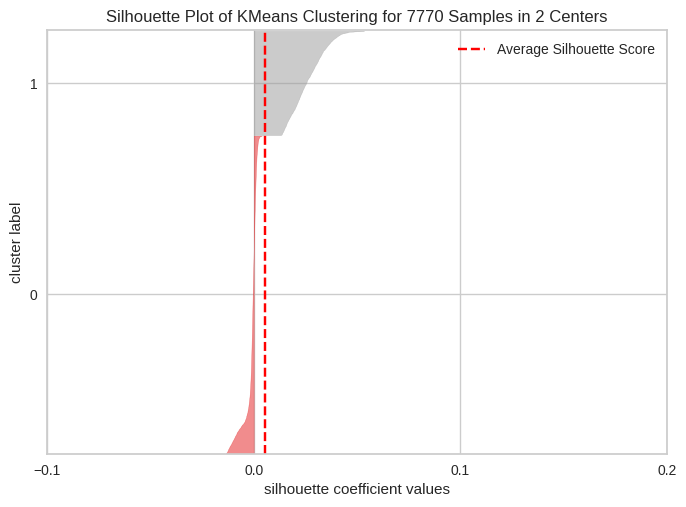

For n_clusters = 3, silhouette score is 0.007145967827163773


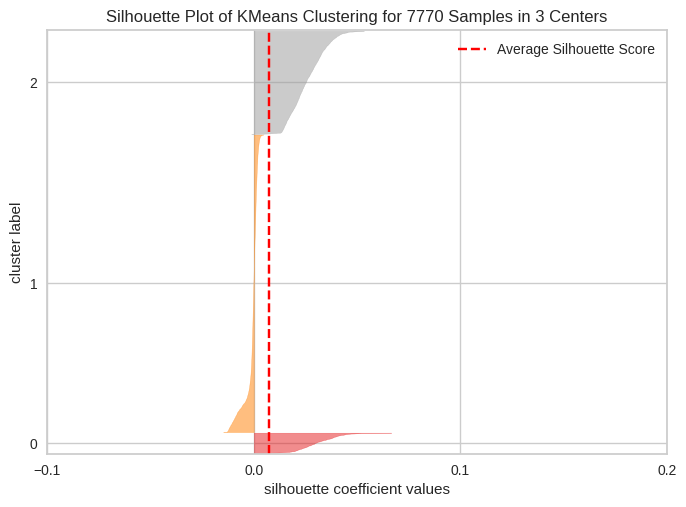

For n_clusters = 4, silhouette score is 0.00806062346352155


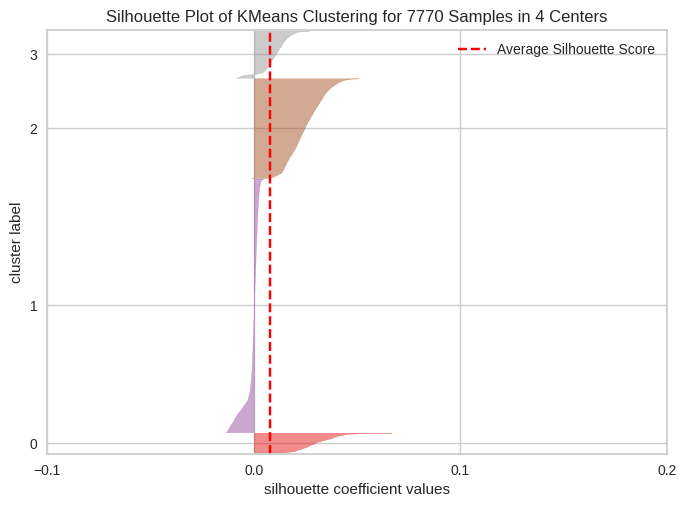

For n_clusters = 5, silhouette score is 0.008541648423819805


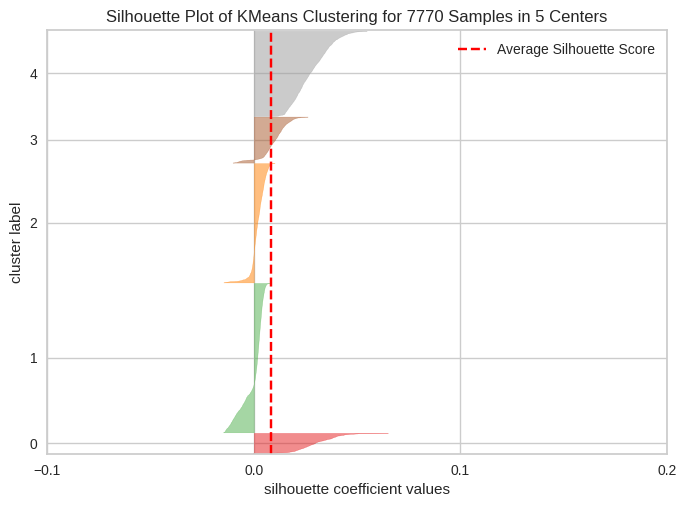

For n_clusters = 6, silhouette score is 0.000553969528558307


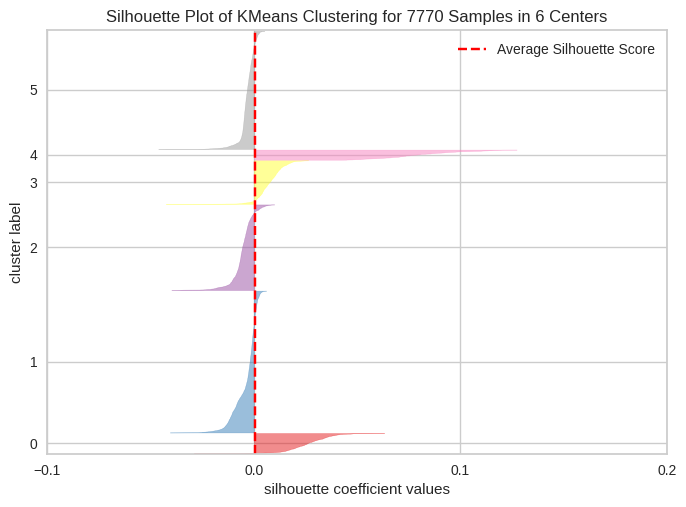

For n_clusters = 7, silhouette score is 0.001424345213032641


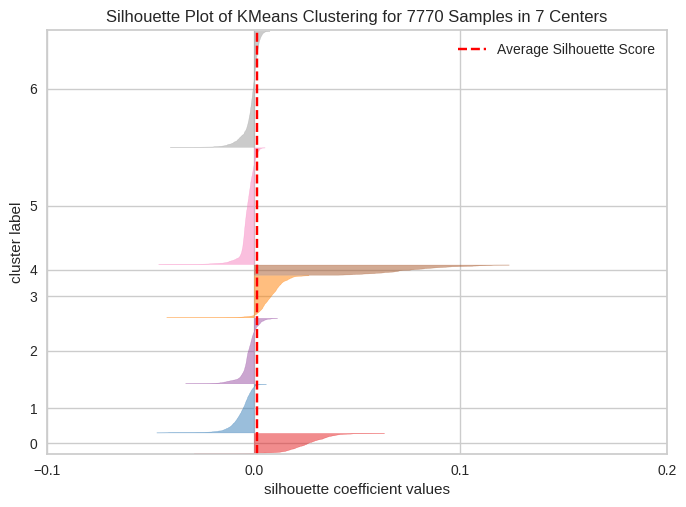

For n_clusters = 8, silhouette score is 0.0066412769130554175


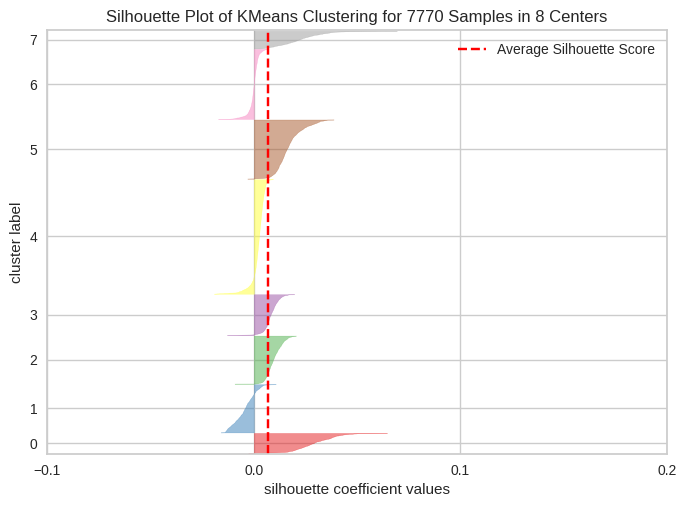

For n_clusters = 9, silhouette score is 0.0028562958550591476


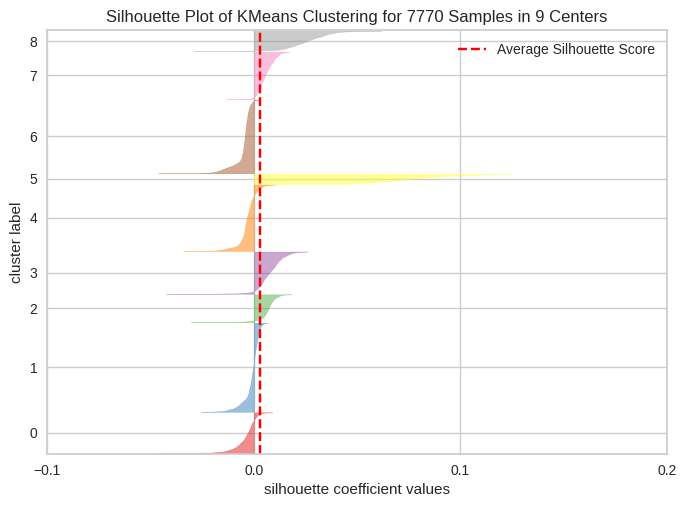

For n_clusters = 10, silhouette score is 0.0034305546679246545


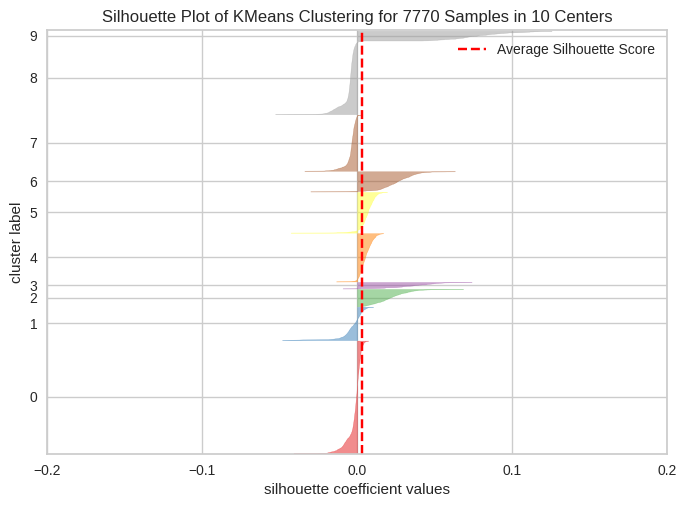

For n_clusters = 11, silhouette score is 0.0037737086178199226


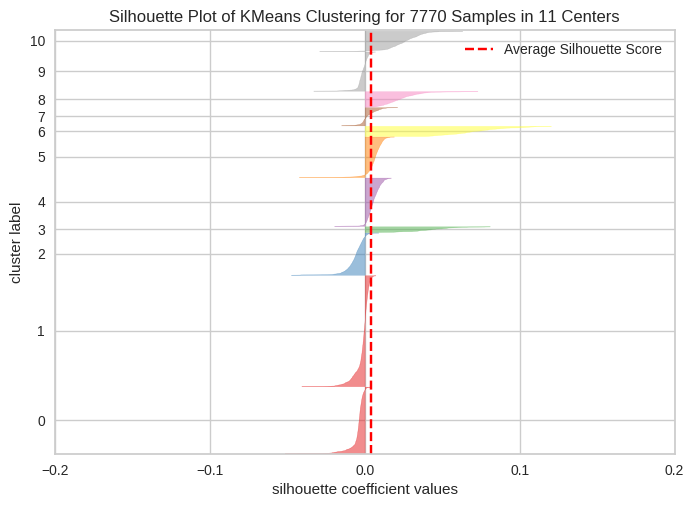

For n_clusters = 12, silhouette score is 0.004239419467889593


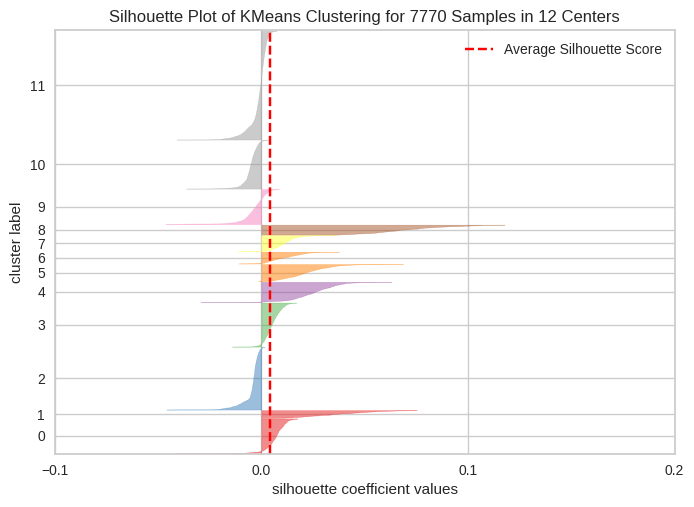

For n_clusters = 13, silhouette score is 0.004637042097022084


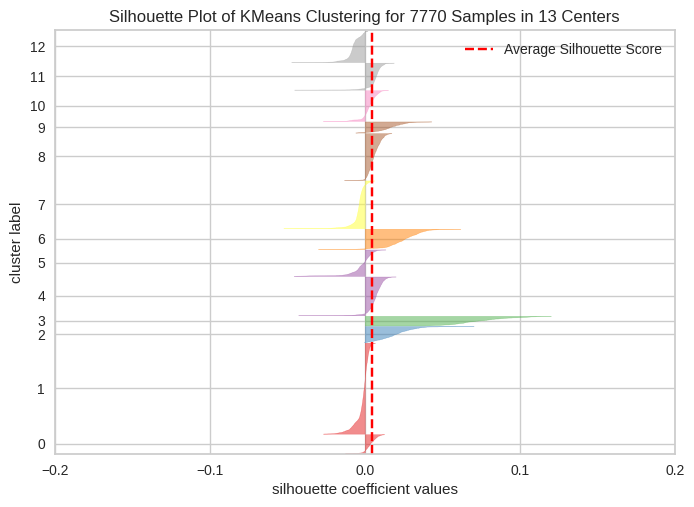

For n_clusters = 14, silhouette score is 0.0046796928216794815


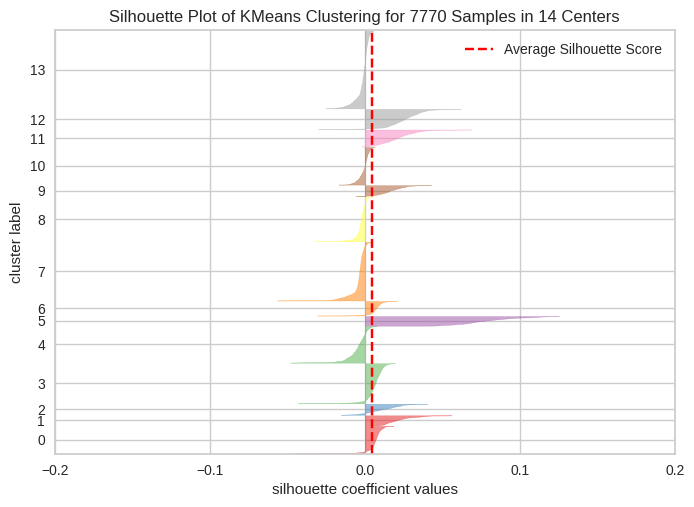

For n_clusters = 15, silhouette score is 0.004380276541860211


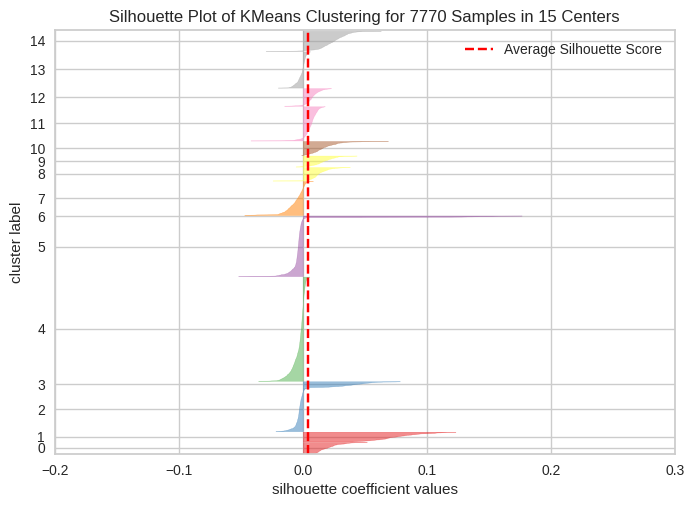

For n_clusters = 16, silhouette score is 0.005563857706235594


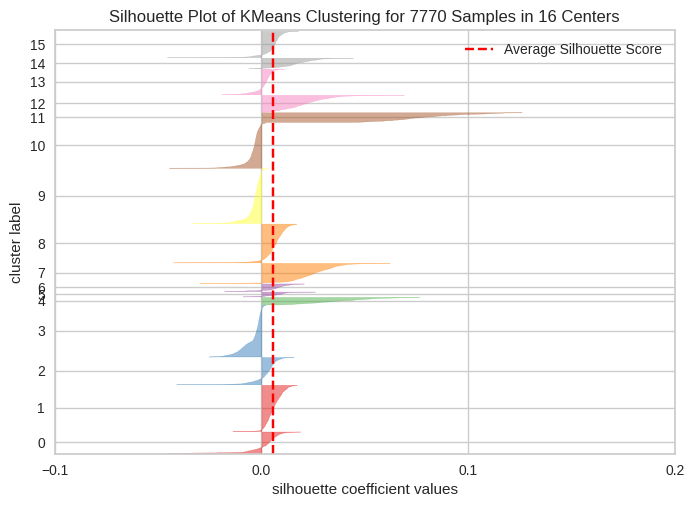

For n_clusters = 17, silhouette score is 0.0058120630959335165


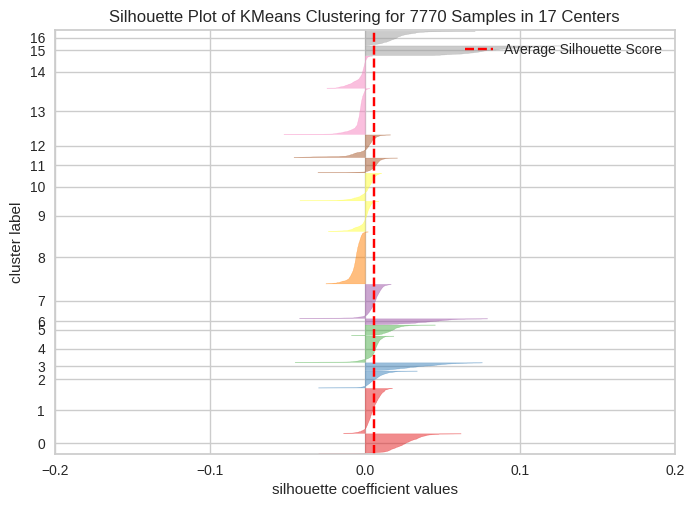

For n_clusters = 18, silhouette score is 0.005827296881929267


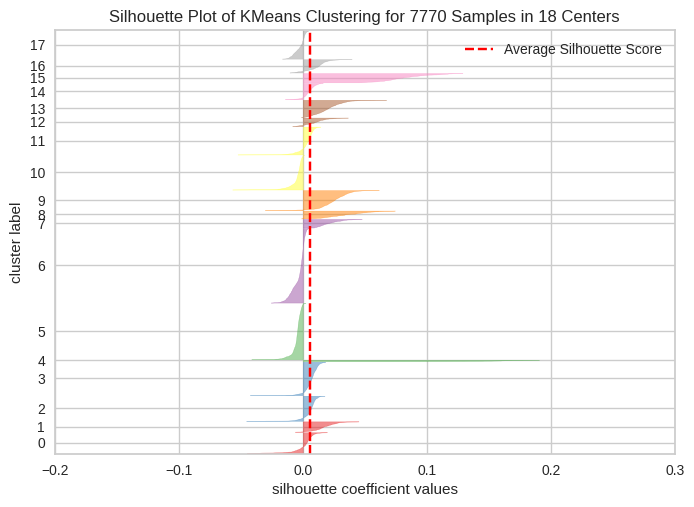

For n_clusters = 19, silhouette score is 0.0064244025195352465


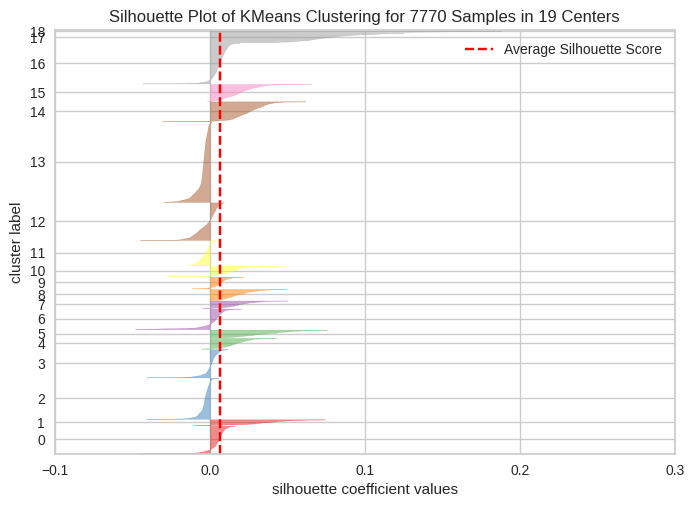

For n_clusters = 20, silhouette score is 0.0048736382609954115


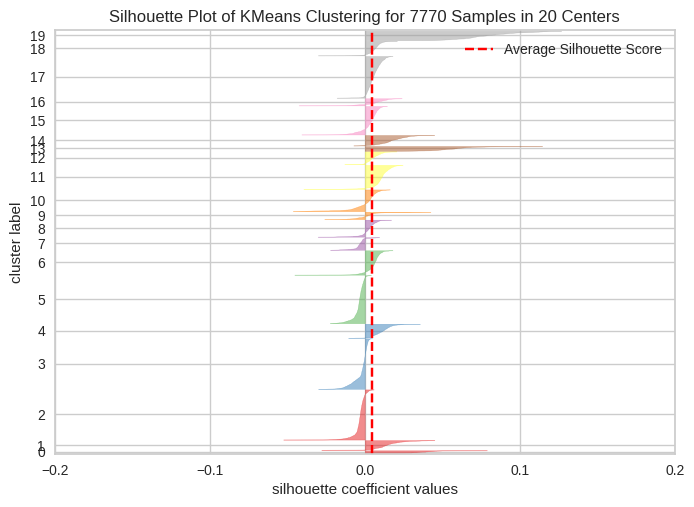

For n_clusters = 21, silhouette score is 0.006674956851119541


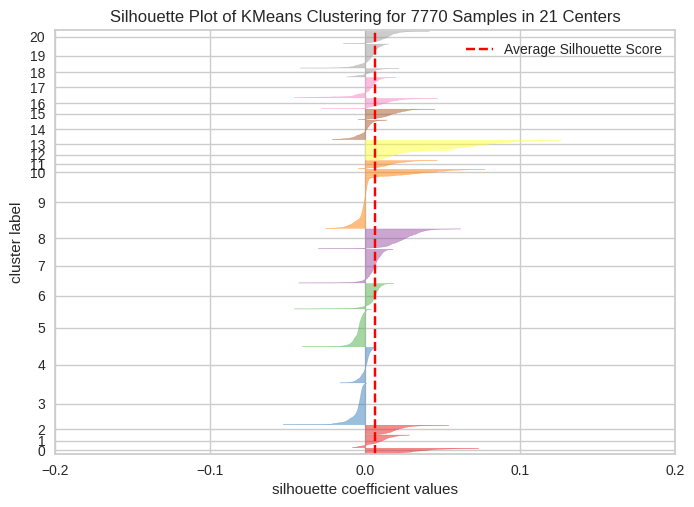

In [ ]:
silhouette_score_analysis(22)

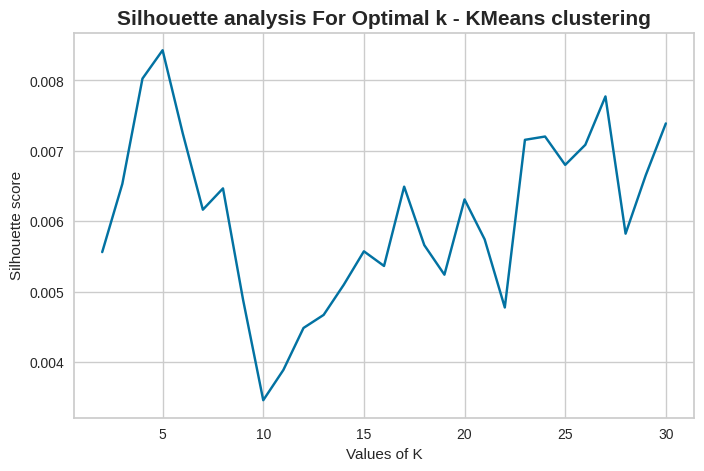

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(X, cluster_labels))
#plot
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering',fontsize=15, fontweight='bold')
plt.show()

*   **Six clusters receive the highest Silhouette score overall.**
*   **Utilising the k-means clustering algorithm to create 6 clusters.**

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=50)
kmeans.fit(X)



KMeans(n_clusters=6, random_state=50)

In [ ]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[-3.80827459e-02,  2.64584886e-02,  2.29280676e-02, ...,
        -8.49333643e-06, -2.35279961e-05, -4.94959105e-06],
       [-5.36023664e-02,  6.58554344e-02, -9.05915282e-02, ...,
        -8.79442568e-05, -1.69792656e-05, -3.53938831e-06],
       [-5.47031098e-02, -7.38122837e-02, -1.31925007e-02, ...,
        -7.29480196e-05,  4.25311917e-05, -1.85607266e-05],
       [ 1.33512091e-01,  9.84665334e-02, -1.04976597e-01, ...,
         5.31224611e-05, -1.72325720e-04, -1.40805906e-04],
       [-3.66636270e-02,  9.88044739e-02,  1.39215828e-01, ...,
         1.25489071e-04,  1.85278709e-04, -5.55483620e-05],
       [ 1.66627023e-01, -2.28181084e-02,  1.33842876e-02, ...,
         1.31921571e-04, -2.06678945e-05,  8.77821215e-05]])

In [ ]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

6355.171332110671

In [ ]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

array([5, 2, 2, ..., 1, 5, 1], dtype=int32)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6355.171332110671, 0.005495716076809204)


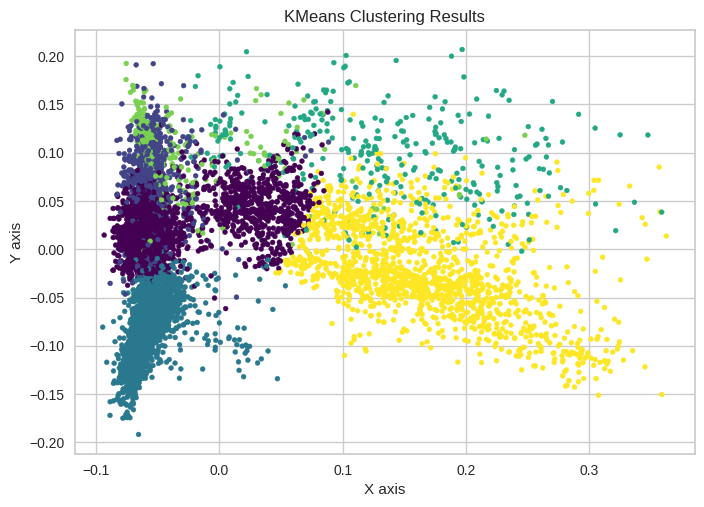

In [ ]:
# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='viridis', marker='.')
plt.title('KMeans Clustering Results')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 6
Silhouette score: 0.005495716076809204
Calinski-Harabasz score: 33.57364033185855
Davies-Bouldin score: 10.15934975032775
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-------------+
|    | Evaluation Metrics      |      Result |
+====+=========================+=============+
|  0 | Silhouette score        |  0.00549572 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz score | 33.5736     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin score    | 10.1593     |
+----+-------------------------+-------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



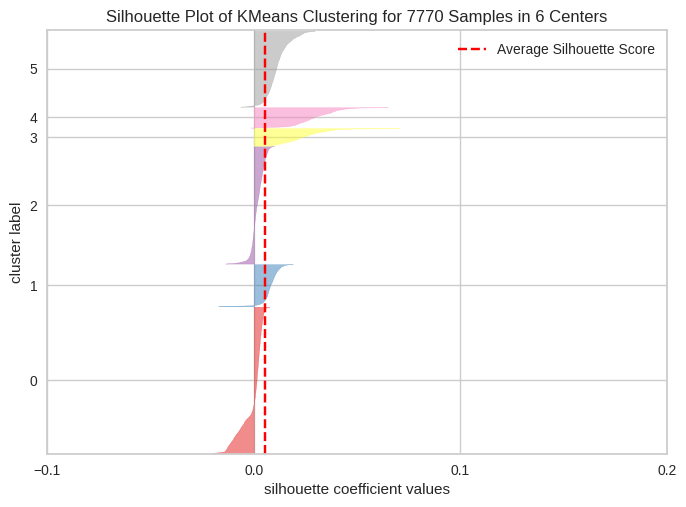

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


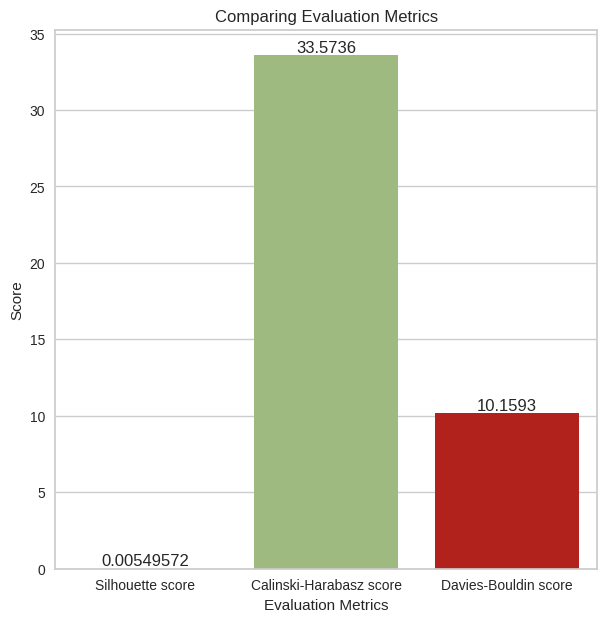

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Evaluation of Model
Kmeans_eval=evaluate_clustering_model(kmeans, X, y_predict)

- **We got a Silhouette score of  0.00549572, a Calinski-Harabasz score of 33.5736, and a Davies-Bouldin score of 10.1593 after evaluation of the model.**

In [ ]:
# Adding a kmeans cluster number attribute
## Assigne Movies and TV Shows to its cluster


# Copy dataset
kmeans_df=df.copy()

# Droping non original features from dataset
kmeans_df.drop(columns={}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
kmeans_df['cluster'] = kmeans.labels_
kmeans_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added,clustering,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,2020,"[unknown, joao, miguel, bianca, comparato, mic...",5
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,2016,"[jorge, michel, grau, demian, bichir, hector, ...",2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,2018,"[gilbert, chan, tedd, chan, stella, chung, hen...",2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,2017,"[shane, acker, elijah, wood, john, c, reilly, ...",0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,2020,"[robert, luketic, jim, sturgess, kevin, spacey...",0


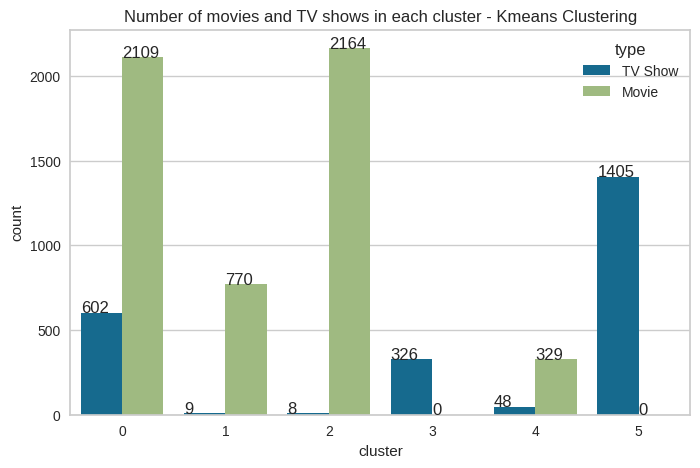

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x=kmeans_df['cluster'],data=kmeans_df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**K-means clustering technique was successfully used to construct 6 clusters**

## <font size='5px'><font color='cmehandi'>**Hierarchical clustering**

#### **<u>Dendogram Method</u>**
Finding the optimal number of clusters using the dendogram

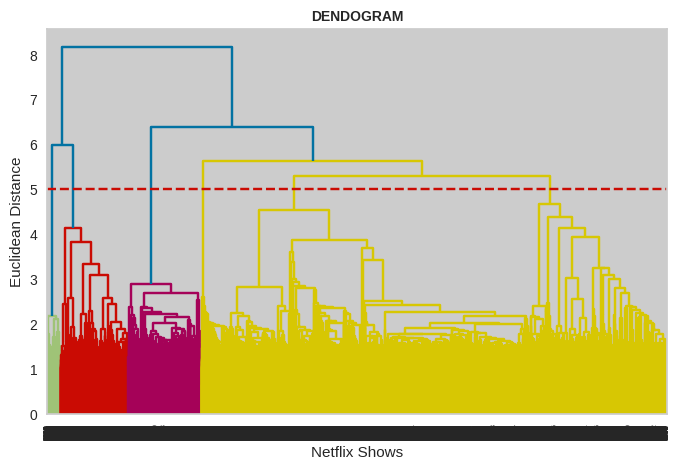

In [ ]:
## Using the dendogram to find the optimal number of clusters

# Import necessary libraries
import scipy.cluster.hierarchy as sch

# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(8,5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('DENDOGRAM',fontsize=10, fontweight='bold')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

#### **<u>Silhouette Score Method</u>**
Finding optimal number of cluster using silhouette score method

In [ ]:
## Training the hierarchical clustering model on a dataset for number of clusters K=19

# Import dependancy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([2, 5, 2, ..., 3, 1, 3])

In [ ]:
# Adding a hirerical cluster number attribute
y_predict = hierarchical.labels_
y_predict

array([2, 5, 2, ..., 3, 1, 3])

In [ ]:
### Evaluation of hierarchical clustering model
## Function to evaluate and visualize evaluation metrics of the hierarchical clustering model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def hierarchical_clustering_eval(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)

    # Data
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)

    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :



Number of clusters: 12
Silhouette score: -0.0003893748262890357
Calinski-Harabasz score: 17.502259261538725
Davies-Bouldin score: 9.612066037358817
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+--------------+
|    | Evaluation Metrics      |       Result |
+====+=========================+==============+
|  0 | Silhouette score        | -0.000389375 |
+----+-------------------------+--------------+
|  1 | Calinski-Harabasz score | 17.5023      |
+----+-------------------------+--------------+
|  2 | Davies-Bouldin score    |  9.61207     |
+----+-------------------------+--------------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



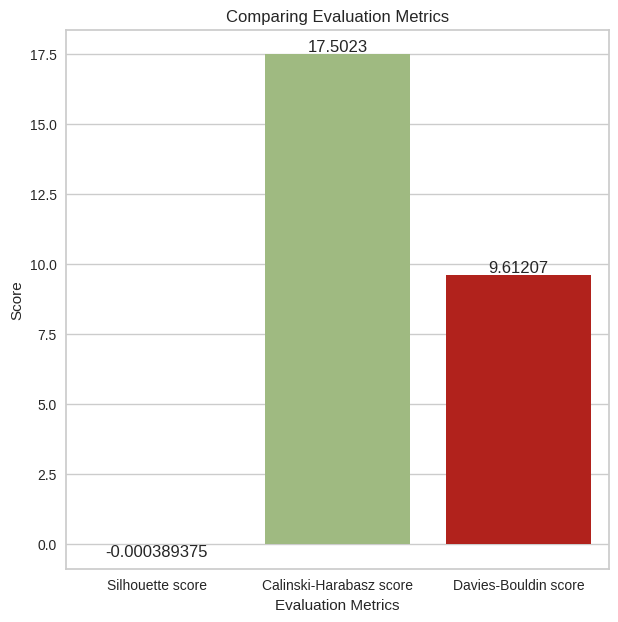

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Evaluation of Model
hierarchical_eval=hierarchical_clustering_eval(hierarchical, X, y_predict)

- **We got a Silhouette score of  -0.00389375, a Calinski-Harabasz score of 17.5023, and a Davies-Bouldin score of 9.61207 after evaluation of the model.**

In [ ]:
## Assigne Movies and TV Shows to its cluster

# Copy dataset
hierarchical_df=df.copy()

# Droping non original features from dataset
hierarchical_df.drop(columns={}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
hierarchical_df['cluster'] = hierarchical.labels_
hierarchical_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added,clustering,cluster
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,2020,"[unknown, joao, miguel, bianca, comparato, mic...",2
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,2016,"[jorge, michel, grau, demian, bichir, hector, ...",5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,2018,"[gilbert, chan, tedd, chan, stella, chung, hen...",2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,2017,"[shane, acker, elijah, wood, john, c, reilly, ...",0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,2020,"[robert, luketic, jim, sturgess, kevin, spacey...",0


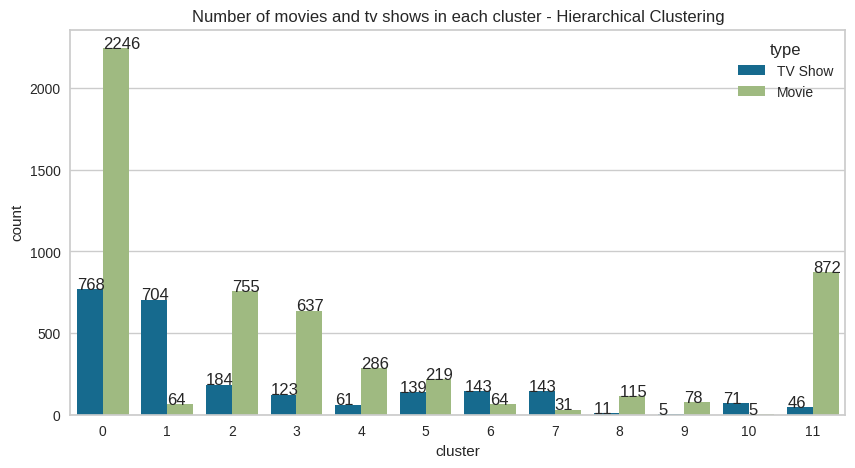

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x=hierarchical_df['cluster'],data=hierarchical_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Utilising the Agglomerative (hierarchical) clustering algorithm, 12 clusters were successfully

Text(0, 0.5, 'Number of Movies / TV Shows')

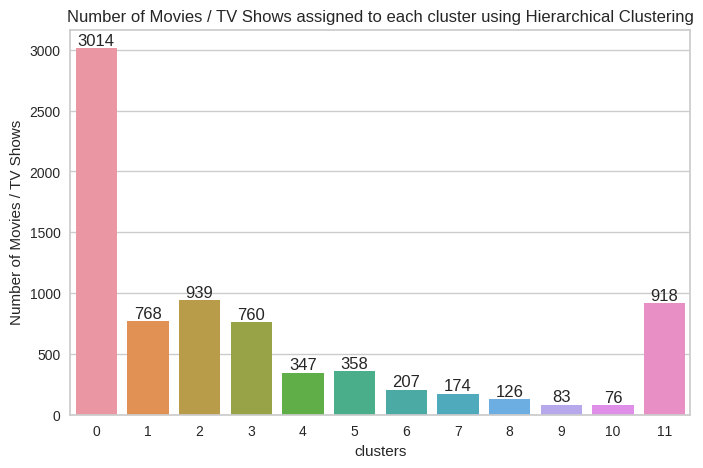

In [ ]:
## Finding number of Movies / TV Shows assigned to each cluster

# Create dataframe for  number of movies/Tv shows in each cluster
num_datapoint_in_clusters=hierarchical_df['cluster'].value_counts().reset_index()

# Plotting bar plot
plt.figure(figsize=(8,5))
ax=sns.barplot(x=num_datapoint_in_clusters['index'],y=num_datapoint_in_clusters['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Number of Movies / TV Shows assigned to each cluster using Hierarchical Clustering")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

## <font size='5px'><font color='#123crad'>**DBSCAN Clustering**

Density-Based Spatial Clustering of Applications with Noise

In [ ]:
## Training the DBSCAN model on a dataset

# Import dependancy
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
# Fitting model
X,_ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [ ]:
# Predict result
y_predict = dbscan.labels_
y_predict

array([-1, -1, -1, -1,  0,  1, -1,  4, -1, -1,  3,  0,  0, -1, -1,  2,  0,
       -1,  2,  0,  3,  0, -1, -1, -1, -1,  1, -1,  2, -1,  2,  4,  4, -1,
       -1,  3, -1,  3, -1, -1, -1,  3, -1, -1,  3, -1, -1,  0, -1,  1, -1,
        5, -1,  0, -1,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        4,  5, -1,  0,  2, -1,  5,  0, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  4, -1,  3])

In [ ]:
### Evaluation of DBSCAN model
## Function to evaluate and visualize evaluation metrics of the DBSCAN model

# Import necessary dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def dbscan_clustering_eval(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.

    Parameters:
    model (object): A clustering model object.
    X (array): The input data.
    y_predict: Prediction on model.

    Returns:
    Model evaluation result
    """

    # Calculate evaluation metrics
    print('~~'*45)
    print('Evaluation result :\n')
    silhouette = silhouette_score(X, y_predict)
    ch_score = calinski_harabasz_score(X, y_predict)
    db_score = davies_bouldin_score(X, y_predict)

    # Print the results
    print(f"Number of clusters: {len(set(y_predict))}")
    print(f"Silhouette score: {silhouette}")
    print(f"Calinski-Harabasz score: {ch_score}")
    print(f"Davies-Bouldin score: {db_score}")
    print('~~'*45)

    # Data
    metrics = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    ev_result = [silhouette, ch_score, db_score]

    # Create a dataframe
    evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
    # Print dataframe
    print(tabulate(evaluation_df, headers='keys', tablefmt='grid'))
    print('\n', '~~'*45, '\n')

    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=evaluation_df['Evaluation Metrics'], y=evaluation_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~~'*45)

    return {'Num_clusters':len(set(y_predict)),'silhouette':silhouette, 'ch_score':ch_score, 'db_score':db_score}

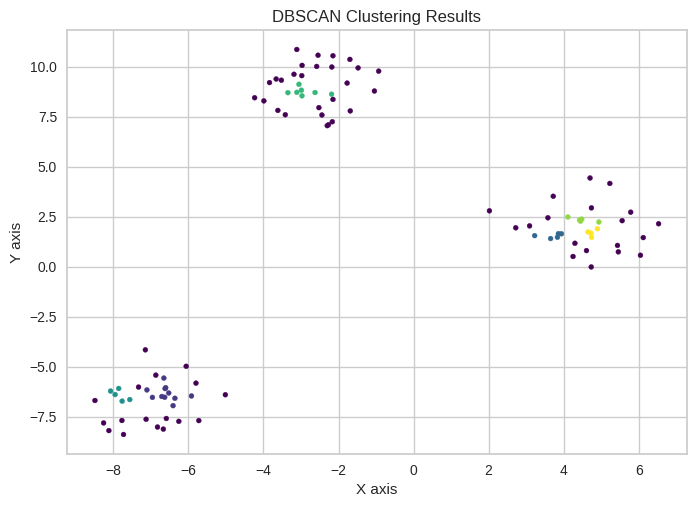

In [ ]:
import matplotlib.pyplot as plt

# Assuming X contains your data points and y_predict contains cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering Results')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Evaluation result :

Number of clusters: 7
Silhouette score: -0.2982273737803317
Calinski-Harabasz score: 9.127599201013073
Davies-Bouldin score: 1.1821464169491922
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
+----+-------------------------+-----------+
|    | Evaluation Metrics      |    Result |
+====+=========================+===========+
|  0 | Silhouette score        | -0.298227 |
+----+-------------------------+-----------+
|  1 | Calinski-Harabasz score |  9.1276   |
+----+-------------------------+-----------+
|  2 | Davies-Bouldin score    |  1.18215  |
+----+-------------------------+-----------+

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



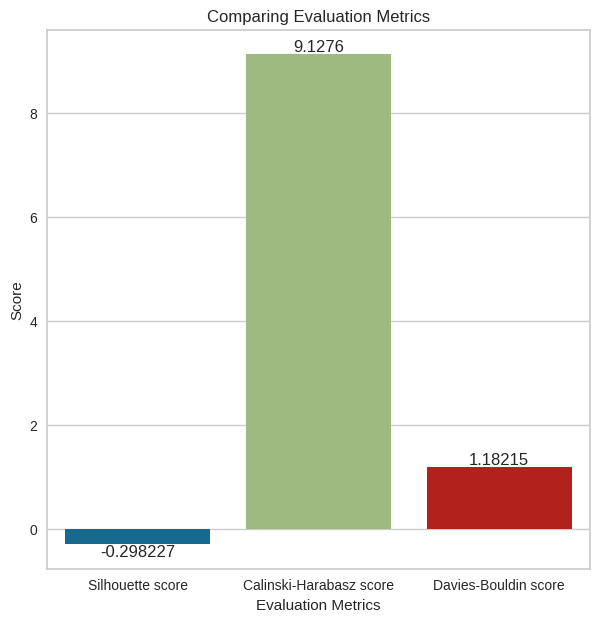

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
# Evaluation of Model
dbscan_eval = dbscan_clustering_eval(dbscan,X, y_predict)

- **We got a Silhouette score of -0.298227, a Calinski-Harabasz score of 9.1276, and a Davies-Bouldin score of 1.18215 after evaluation of the model.**

## <font size='5px'><font color='fdoes'>**<u>Comparing Different Models based on the Evaluation Metrics</u>**

In [ ]:
## Creating dataframe of performance metrics of all builded models

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhouette_score=[Kmeans_eval['silhouette'],hierarchical_eval['silhouette'],dbscan_eval['silhouette']]
calinski_harabasz_score=[Kmeans_eval['ch_score'],hierarchical_eval['ch_score'],dbscan_eval['ch_score']]
davies_bouldin_score=[Kmeans_eval['db_score'],hierarchical_eval['db_score'],dbscan_eval['db_score']]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'silhouette_score': silhouette_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                     'davies_bouldin_score':davies_bouldin_score})
# Dataframe
models_evaluation_df

,model,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,0.005496,33.573640,10.159350
1,Hierarchical Clustering,-0.000389,17.502259,9.612066
2,DBSCAN Clustering,-0.298227,9.127599,1.182146


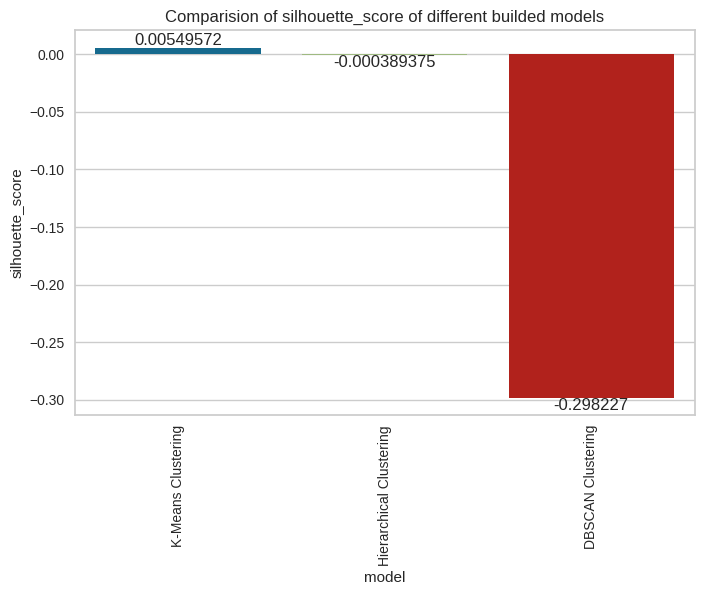

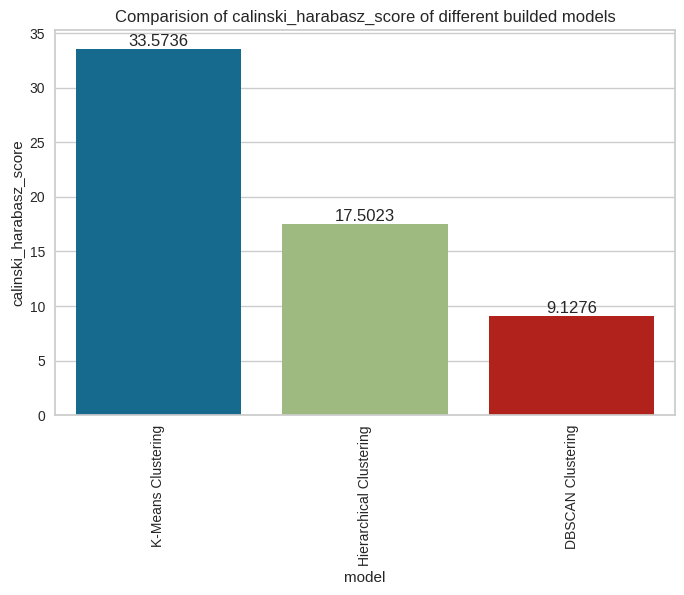

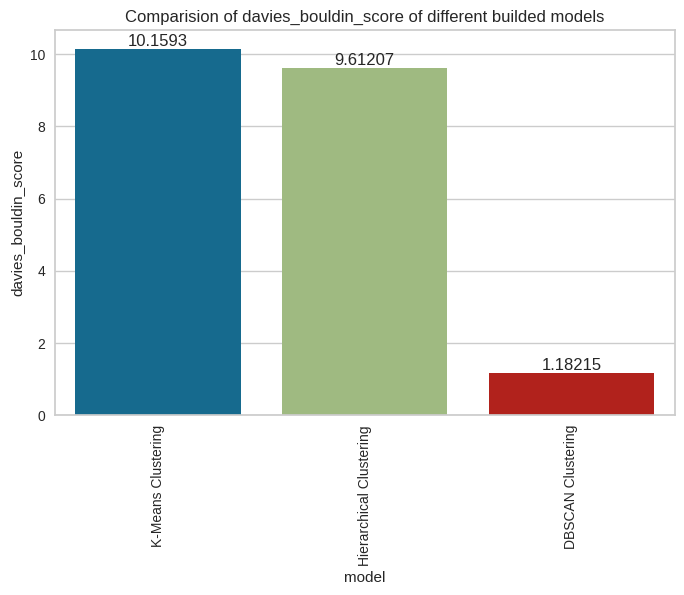

In [ ]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different builded models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

- Model K-Means Clustering has a silhouette_score of 0.005495, which is close to 1 compared to models Hierarchical Clustering (-0.0003893) and DBSCAN Clustering (-0.2987).
- Model K-Means Clustering has the highest calinski_harabasz_score of 33.5736 compared to models Hierarchical Clustering (17.5023) and DBSCAN Clustering (3.54379).
- Models Hierarchical Clustering (9.61207) and DBSCAN Clustering (1.18215) have lower davies bouldin scores than model K-Means Clustering, which has the maximum score of 10.1593.
- #### **Among all models, the K-Means Clustering model has the highest Calinski-Harabasz score (33.5736). Also, K-Means Clustering  model has a silhouette_score of 0.005495, which is close to 1 than other models, which means the K-Means Clustering model is capable of perfectly clustering items.**
- #### **Due to its high Calinski-Harabasz score (33.5736) and silhouette_score (0.005495), which are close to 1, the K-Means Clustering model is the ideal model and well-trained for clustering movies and TV shows based on the content.**

## <font size='5px'><font color='#3429cb'>**Content based Recommendation system:**

In [ ]:
# Changing the index of the df from show id to show title
df['show_id'] = df.index

You had a dataframe with 7770 rows, but some rows were deleted during null value treatment, resulting in a last index of 7786. To construct a content-based recommendation system, you reset the index to avoid index-related issues when calculating cosine similarity.

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df['clustering'] = df['clustering'].apply(lambda x: convert(x))

In [ ]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'target_ages', 'month_added', 'year_added', 'clustering'],
      dtype='object')


In [ ]:
# setting title of movies/Tv shows as index
df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

(7770, 7770)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df.index)

def recommend_top10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)

    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df.index)[i])
    print("If you like this '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_top10('A Man Called God')

If you like this 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Little Baby',
 'My Mister',
 'Extracurricular',
 'Chef & My Fridge',
 'My Secret Romance',
 'Reply 1994']

In [ ]:
# Recommendations for 'Stranger Things'
recommend_top10('Breaking Bad')

If you like this 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Have You Ever Fallen in Love, Miss Jiang?',
 "Marvel's The Punisher",
 'Get Shorty',
 'MINDHUNTER',
 'Jack Taylor',
 'Travelers',
 'Dare Me',
 'Person of Interest',
 'Love']

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_top10('Peaky Blinders')

If you like this 'Peaky Blinders', you may also enjoy:



['Kiss Me First',
 'Happy Valley',
 'The Frankenstein Chronicles',
 'Paranoid',
 'Get Even',
 'London Spy',
 'Giri / Haji',
 'My Hotter Half',
 'The Murder Detectives',
 'Safe']

In [ ]:
# Recommendations for 'Lucifer'
recommend_top10('Lucifer')

If you like this 'Lucifer', you may also enjoy:



['The Good Cop',
 'Get Shorty',
 'Rica, Famosa, Latina',
 'The Expanding Universe of Ashley Garcia',
 'Better Call Saul',
 'Dramaworld',
 'Jack Taylor',
 'Love Rhythms - Accidental Daddy',
 'L.A.’s Finest',
 "Marvel's Iron Fist"]

In [ ]:
# Recommendations for 'Golmaal: Fun Unlimited'
recommend_top10('Golmaal: Fun Unlimited')

If you like this 'Golmaal: Fun Unlimited', you may also enjoy:



['Golmaal Returns',
 'Phir Hera Pheri',
 'Chup Chup Ke',
 'Hattrick',
 'Thank You',
 'Himmatwala',
 'Ferrari Ki Sawaari',
 'Kyaa Kool Hain Hum 3',
 'Maine Pyaar Kyun Kiya',
 'Phir Se']

In [ ]:
# Recommendations for Breaking Bad
recommend_top10('Breaking Bad')

If you like this 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Have You Ever Fallen in Love, Miss Jiang?',
 "Marvel's The Punisher",
 'Get Shorty',
 'MINDHUNTER',
 'Jack Taylor',
 'Travelers',
 'Dare Me',
 'Person of Interest',
 'Love']

# <font size='6px'><font color='peach'><u>**Conclusion:-**<u>

* In this project, we tackled a text clustering problem in which we had to categorize and group Netflix shows into specific clusters in such a way that shows in the same cluster are similar to one another and shows in different clusters are not.

* There were approximately 7787 records and 11 attributes in the dataset.
We started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

* It was discovered that Netflix hosts more movies than television shows on its platform, and the total number of shows added to Netflix is expanding at an exponential rate. Additionally, most of the shows were made in the United States.

* The attributes were chosen as the basis for the clustering of the data: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.
10000 attributes in total were created by TFIDF vectorization.

* The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA). Because 4000 components were able to account for more than 80% of the variance, the total number of components was limited to 4000.

* Utilizing the K-Means Clustering algorithm, we first constructed clusters, and the optimal number of clusters was determined to be 6. The elbow method and Silhouette score analysis were used to get this.

* The Agglomerative clustering algorithm was then used to create clusters, and the optimal number of clusters was determined to be 7. This was obtained after visualizing the dendrogram.

* The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***